# Import Required Libraries
Import pandas, plotting stacks, and the custom visualization helpers so every chart we generate stays consistent with the reusable project code. Knowing exactly which modules are in play helps teammates replicate the figures elsewhere.


In [1]:
from data_preprocessing.visualization_modular import data_overview, numeric_feature_distributions, correlation_and_feature_importance, pca_analysis, tsne_analysis,plot_feature_distributions

# Load Dataset
Load the engineered training table and preview the first rows to sanity-check column names, data types, and the presence of the target before diving into diagnostics. This snapshot often reveals unexpected preprocessing issues early.


In [2]:
import pandas as pd
df = pd.read_csv("data/datatrain.csv")
df.head()

FeatureX  FeatureY      User_ID  Countries_ID  Created At time  \
0         0         0  ID_DC6S4E9O           135  19:33:13.663391   
1         1         0  ID_E8S97OUT           135  22:18:18.228921   
2         0         0  ID_QZ1HASL3           135  23:13:03.266635   
3         1         0  ID_SDV9Q3E9           135  09:50:09.697573   
4         1         0  ID_W942LN7F           135  13:33:06.531662   

   Created At Year  Created At Month  Created At Day_of_month  \
0                1                 1                       16   
1                1                12                       27   
2                1                 1                        1   
3                1                12                       27   
4                1                 1                       16   

   days_left_in_month  visit_std  ...  subm count 3  subm count 8  \
0                  14        0.0  ...             0             0   
1                   4        0.0  ...             0             0   
2                  29        2.0  ...             0             0   
3                   4        0.0  ...             0             0   
4                  14        3.0  ...             0             0   

   subm count 9  subm count 6  subm count 7  subm count 5  subm count 4  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   comments_count  discussions_count  target  
0               0                  0       0  
1               0                  0       1  
2               0                  0       0  
3               0                  0       1  
4               2                  0       1  

[5 rows x 63 columns]

# Data Overview
Run the overview utility to quantify class balance, missing data, and descriptive stats. These summaries show whether the engagement label is imbalanced, which features might need imputation, and how spreads differ across metrics.


In [3]:
data_overview(df)

Target value distribution (normalized):


target
0    0.729599
1    0.270401
Name: proportion, dtype: float64

Missing values per column:


FeatureX             0
FeatureY             0
User_ID              0
Countries_ID         0
Created At time      0
                    ..
subm count 5         0
subm count 4         0
comments_count       0
discussions_count    0
target               0
Length: 63, dtype: int64

Summary statistics:


FeatureX     FeatureY  Countries_ID  Created At Year  \
count  9068.000000  9068.000000   9068.000000           9068.0   
mean      0.088994     0.488972    108.221217              1.0   
std       0.284751     0.843291     50.415046              0.0   
min       0.000000     0.000000      0.000000              1.0   
25%       0.000000     0.000000     60.000000              1.0   
50%       0.000000     0.000000    135.000000              1.0   
75%       0.000000     1.000000    146.000000              1.0   
max       1.000000     3.000000    146.000000              1.0   

       Created At Month  Created At Day_of_month  days_left_in_month  \
count       9068.000000              9068.000000         9068.000000   
mean           5.502206                16.804257           13.886083   
std            4.612131                 9.435668            9.403902   
min            1.000000                 1.000000            0.000000   
25%            2.000000                 8.000000            5.000000   
50%            3.000000                18.000000           12.000000   
75%           11.000000                26.000000           23.000000   
max           12.000000                31.000000           30.000000   

         visit_std  visit_count  job_activity_count  ...  subm count 3  \
count  9068.000000  9068.000000         9068.000000  ...   9068.000000   
mean      0.625827    18.679863            0.096714  ...      0.001544   
std       1.583785    25.923043            0.633795  ...      0.039264   
min       0.000000     0.000000            0.000000  ...      0.000000   
25%       0.000000     8.000000            0.000000  ...      0.000000   
50%       0.000000    12.000000            0.000000  ...      0.000000   
75%       0.000000    21.000000            0.000000  ...      0.000000   
max      12.000000   885.000000           19.000000  ...      1.000000   

       subm count 8  subm count 9  subm count 6  subm count 7  subm count 5  \
count   9068.000000   9068.000000   9068.000000   9068.000000   9068.000000   
mean       0.005073      0.003198      0.010587      0.001654      0.000993   
std        0.071047      0.058385      0.104484      0.040640      0.031490   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      2.000000      2.000000      1.000000      1.000000   

       subm count 4  comments_count  discussions_count       target  
count   9068.000000     9068.000000        9068.000000  9068.000000  
mean       0.000662        0.015439           0.104874     0.270401  
std        0.025716        0.240821           0.450392     0.444192  
min        0.000000        0.000000           0.000000     0.000000  
25%        0.000000        0.000000           0.000000     0.000000  
50%        0.000000        0.000000           0.000000     0.000000  
75%        0.000000        0.000000           0.000000     1.000000  
max        1.000000       11.000000          12.000000     1.000000  

[8 rows x 61 columns]

# Correlation & Feature Importance
Inspect Pearson correlations alongside mutual-information scores to see which signals move linearly with the target and which capture non-linear relationships. This informs feature selection in case there was linear relationship 


Correlation of numeric features with target:


days_left_in_month                  -0.150886
FeatureY                            -0.065647
Joined Team                         -0.024573
Invited Member To Team              -0.023084
Accepted Team Leadership Transfer   -0.012789
                                       ...   
badge_OCZE                           0.271543
Created At Month                     0.359003
target                               1.000000
Created At Year                           NaN
Changed Password                          NaN
Name: target, Length: 61, dtype: float64

Mutual information scores for numeric features:


Created At Month                        0.182879
badge_OCZE                              0.069751
visit_count                             0.062330
Viewed All Discussions                  0.061745
Confirmed Email                         0.056922
Countries_ID                            0.052606
Viewed All Competitions                 0.048258
Created At Day_of_month                 0.043154
Viewed All Learning Pages               0.038456
days_left_in_month                      0.037682
Signed Up                               0.037380
comp_activity_count                     0.027180
visit_std                               0.025705
$identify                               0.017148
Downloaded Competition Datafile         0.014882
Joined Competition                      0.013500
$create_alias                           0.012412
subm count 10                           0.011214
comments_count                          0.010820
Updated Profile                         0.010299
Applied To Job      

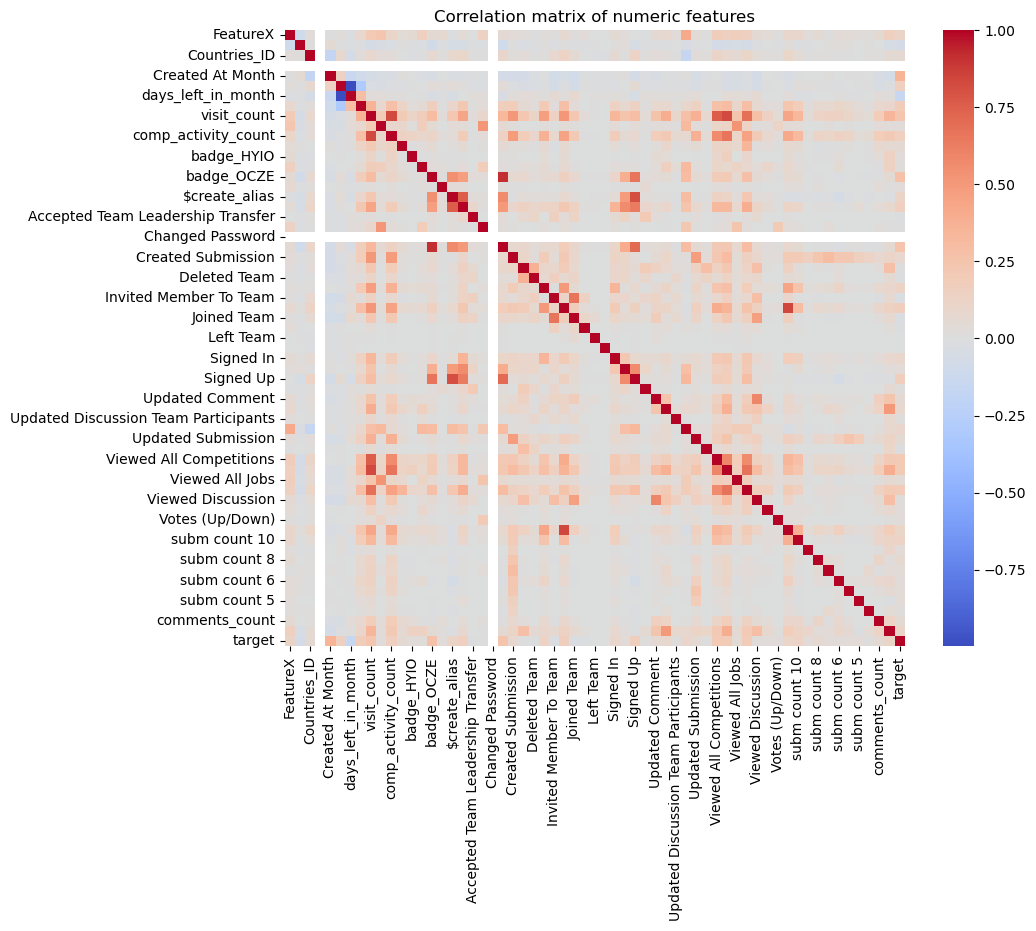

In [5]:
correlation_and_feature_importance(df)

# Feature Distribution and Box Plot
Plot histograms and box plots for the most informative features to understand skew, heavy tails, and median shifts between classes. These visuals highlight potential thresholds, outliers, or what features show most seperation.


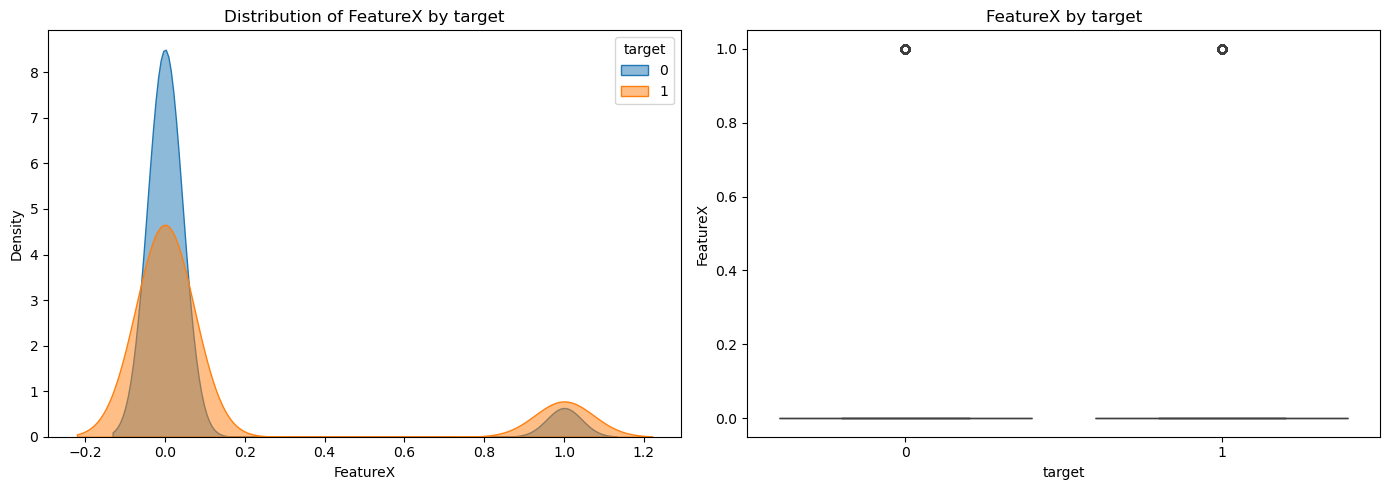

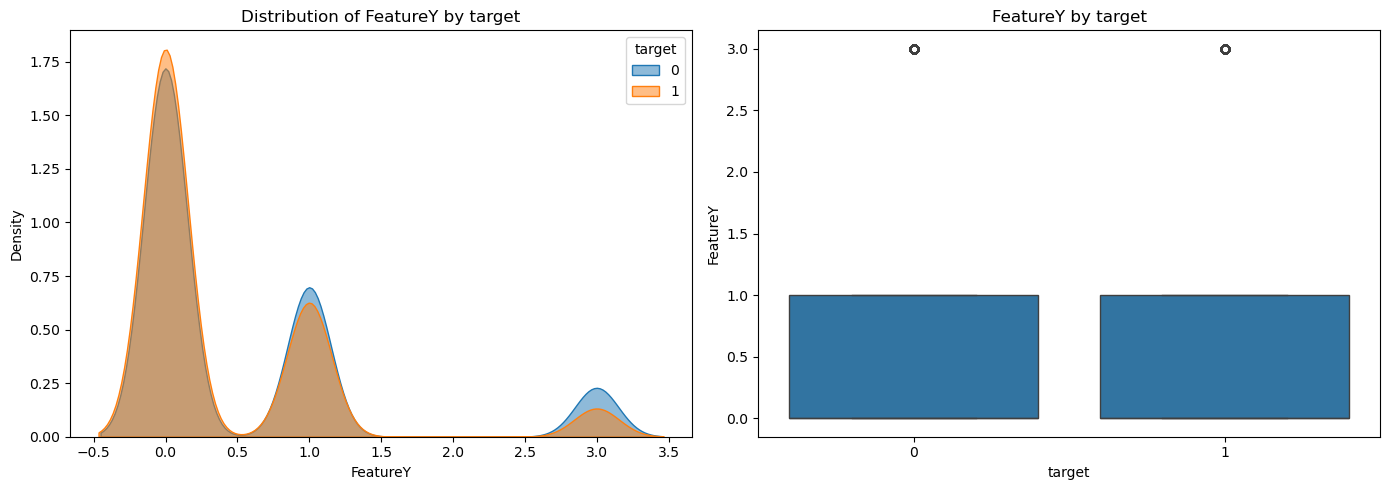

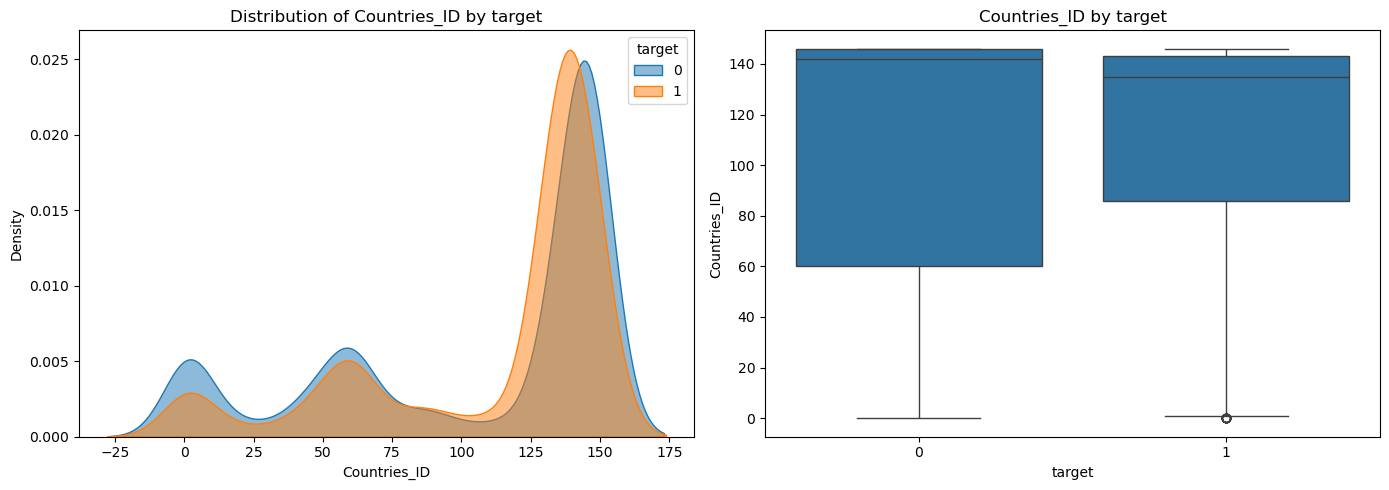

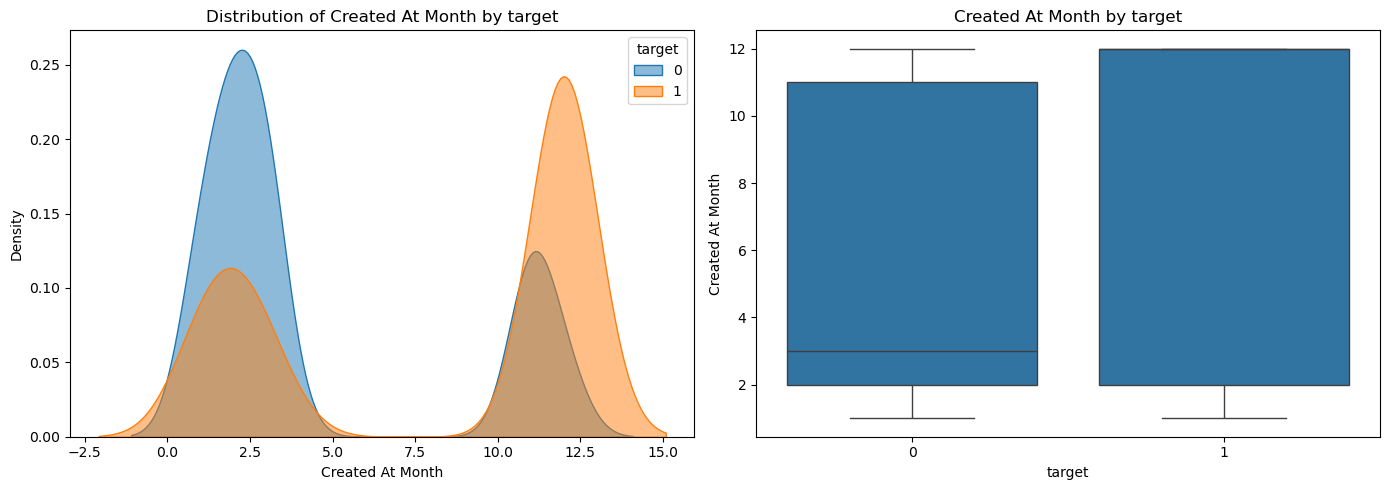

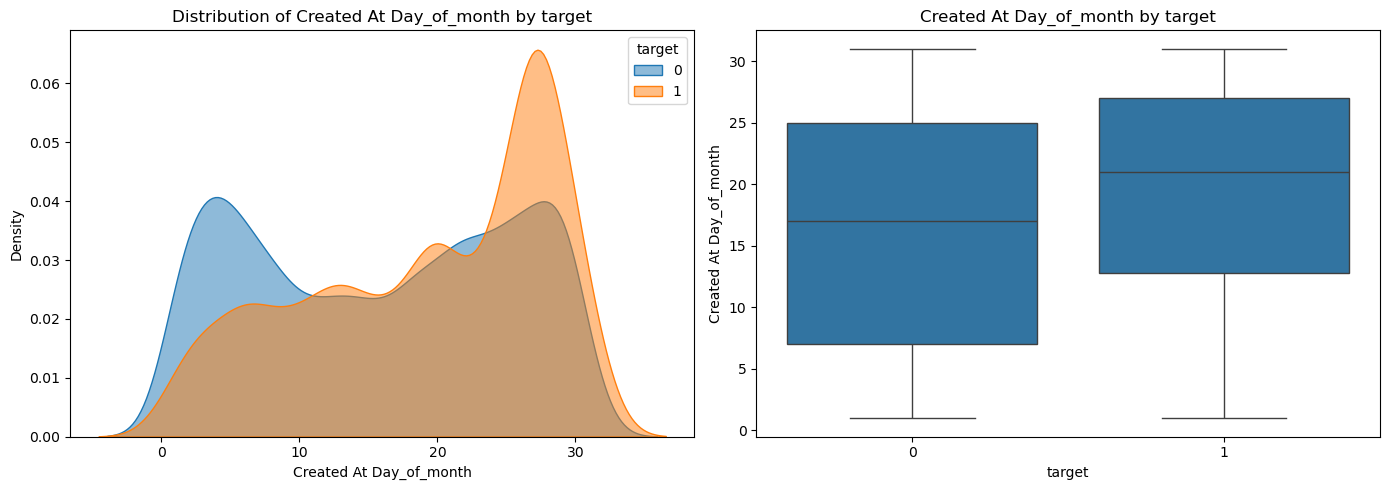

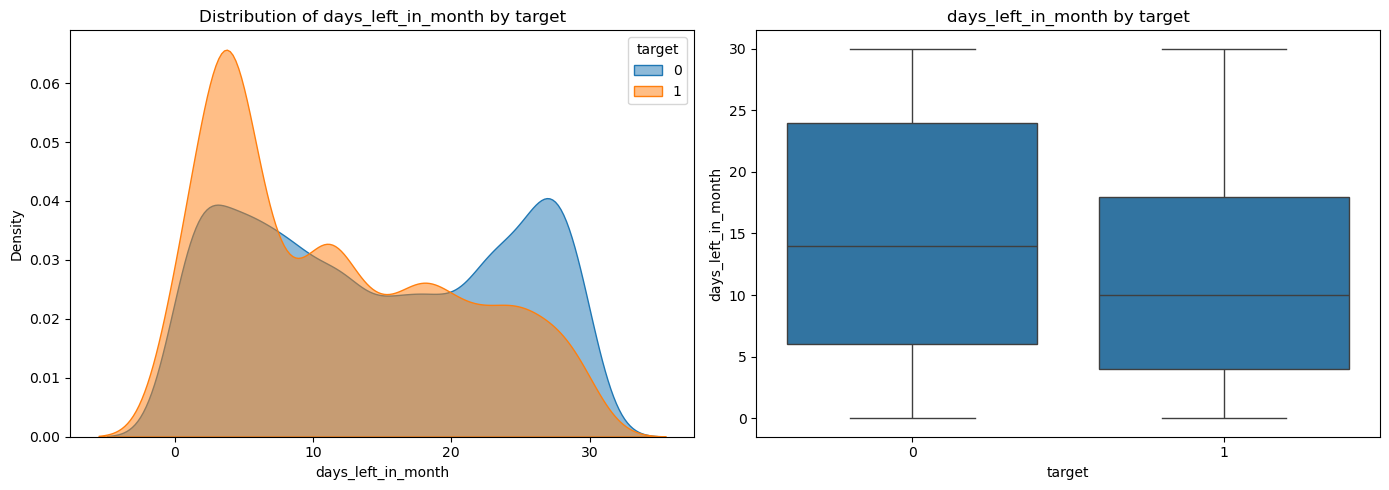

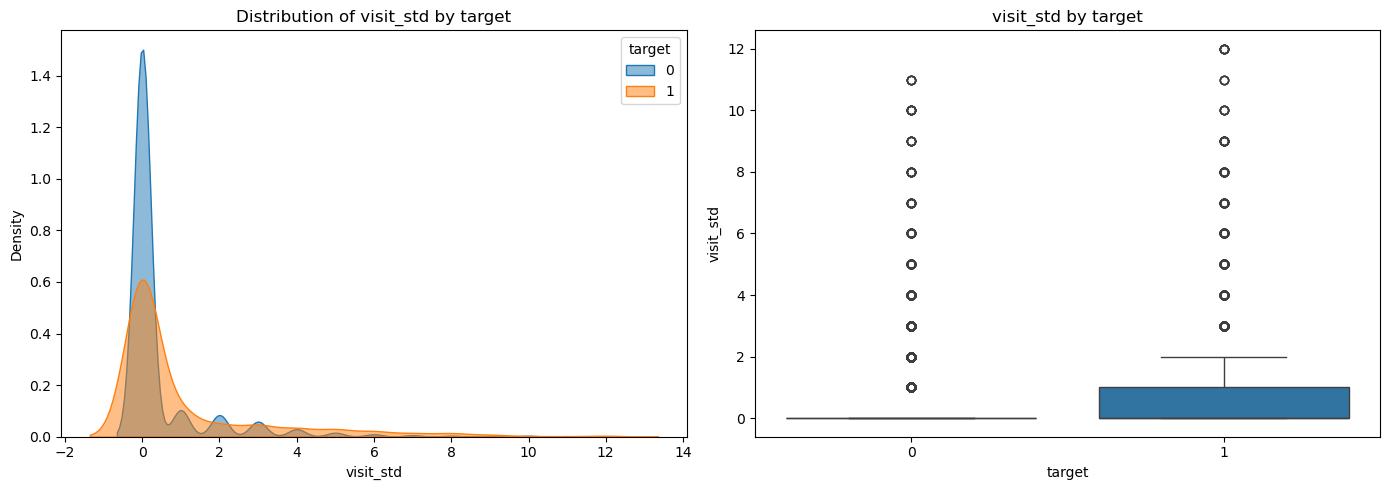

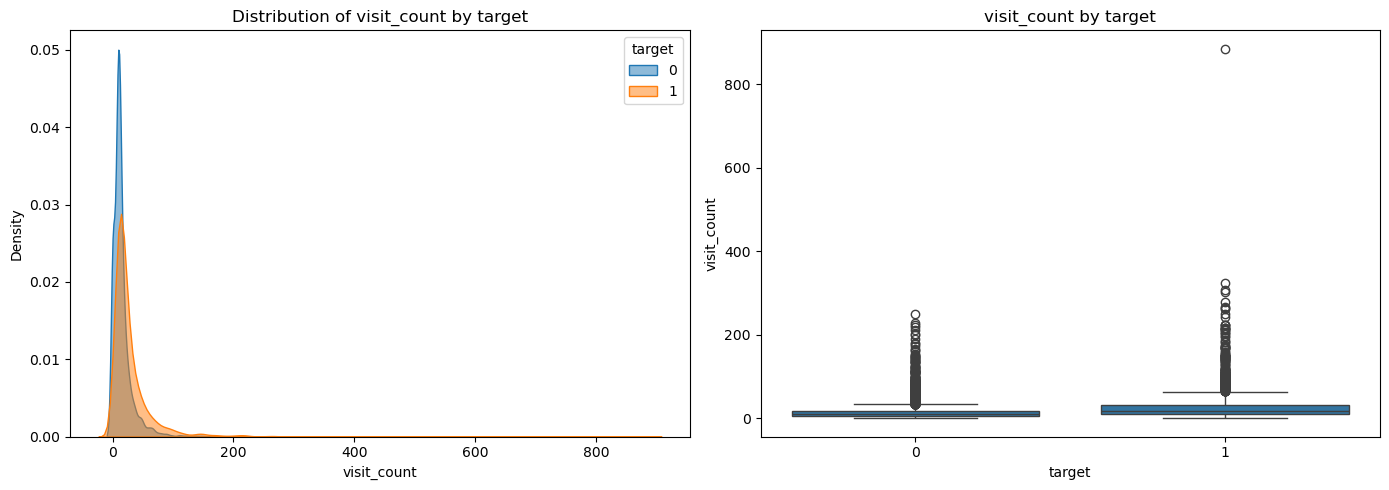

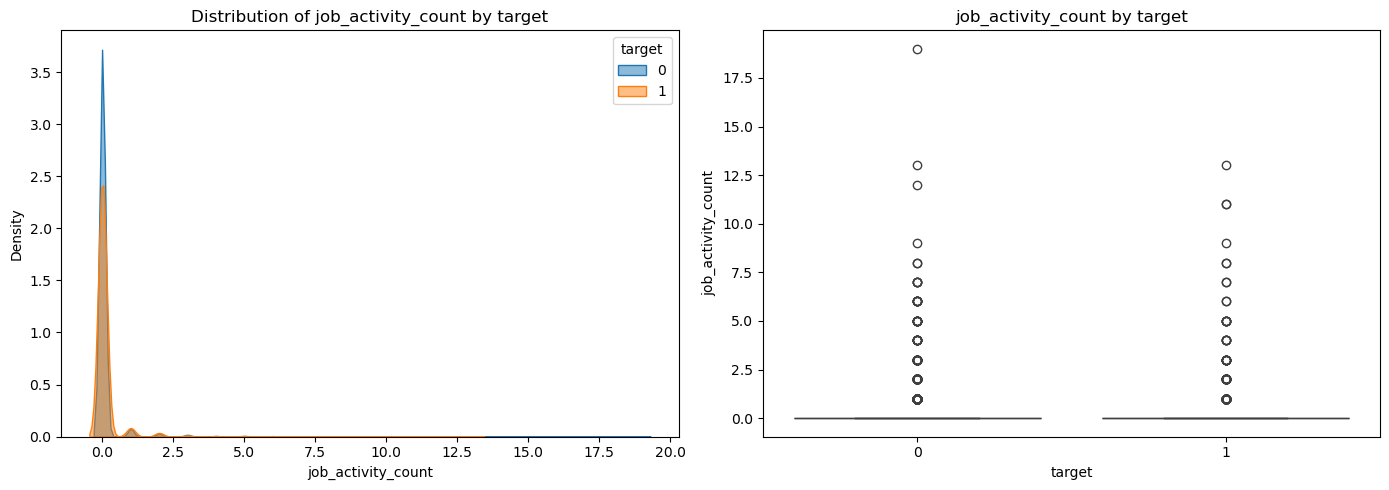

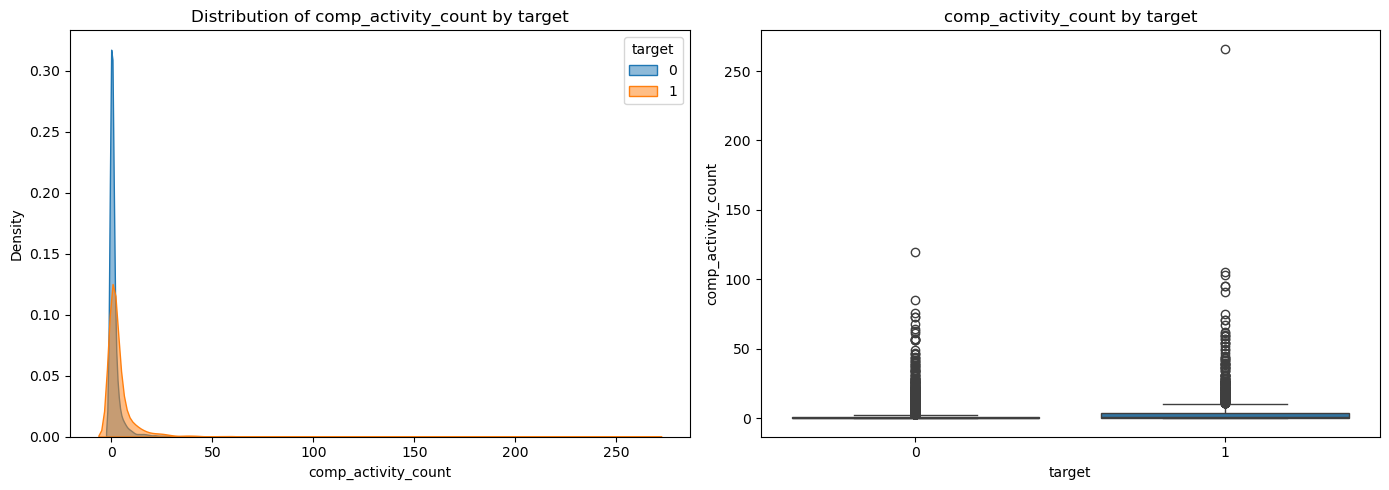

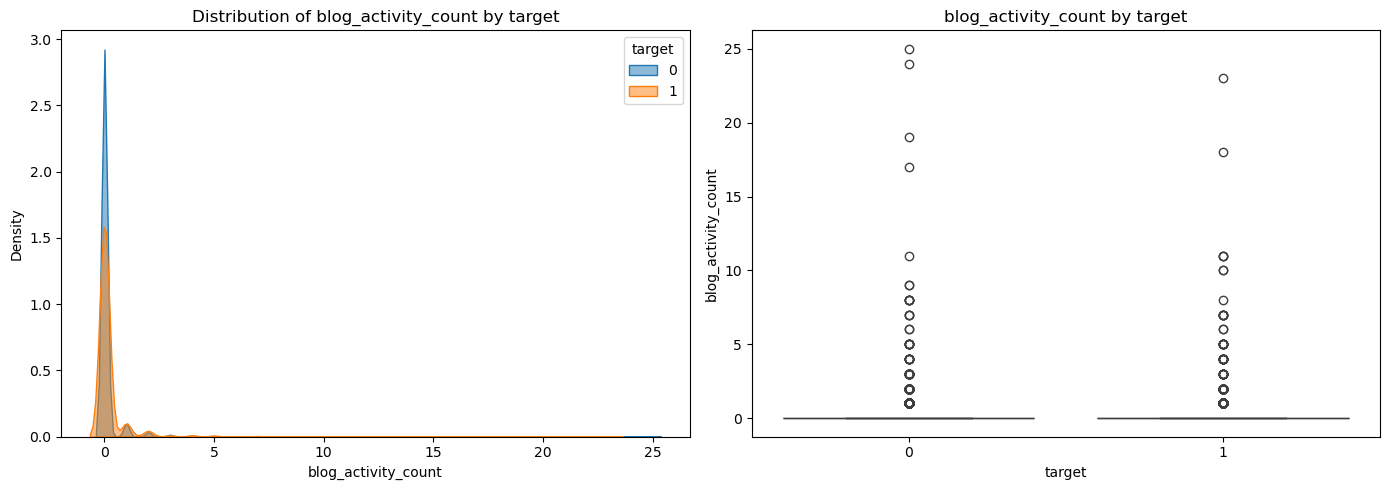

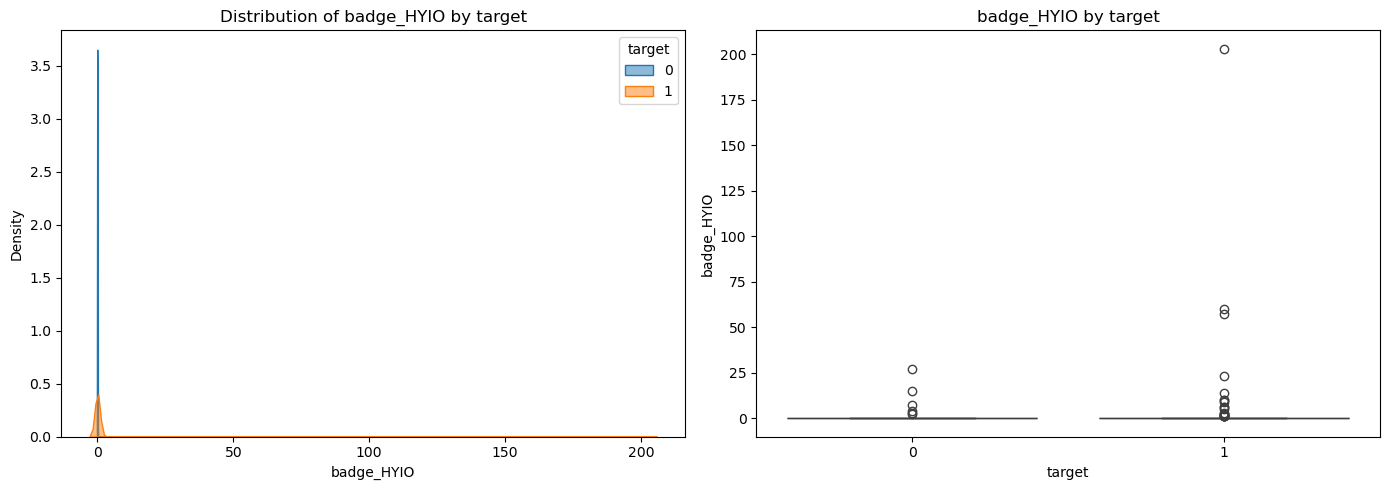

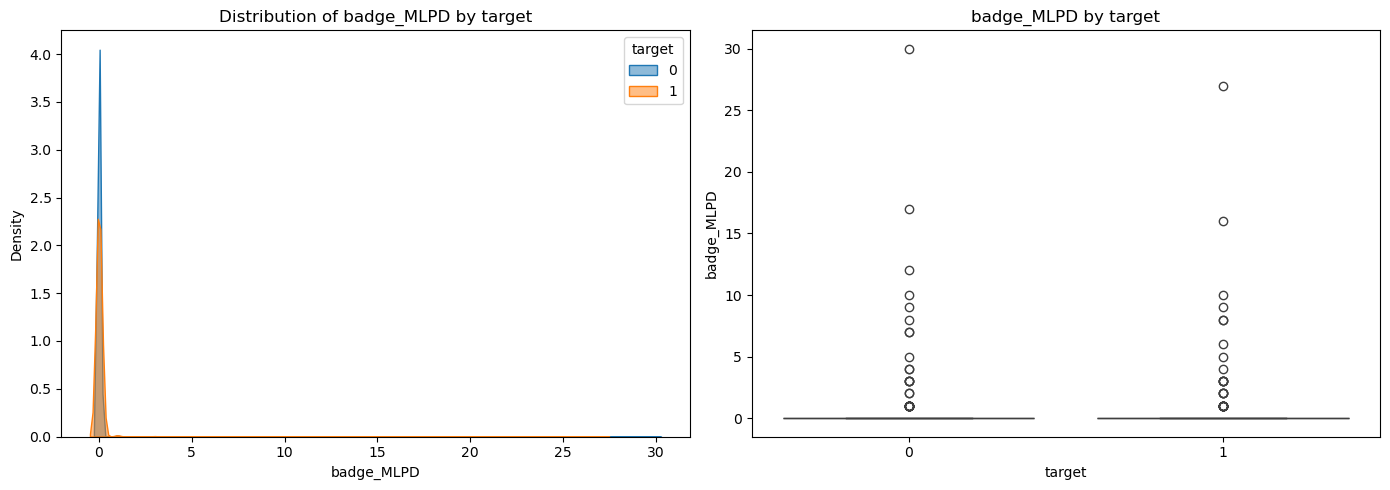

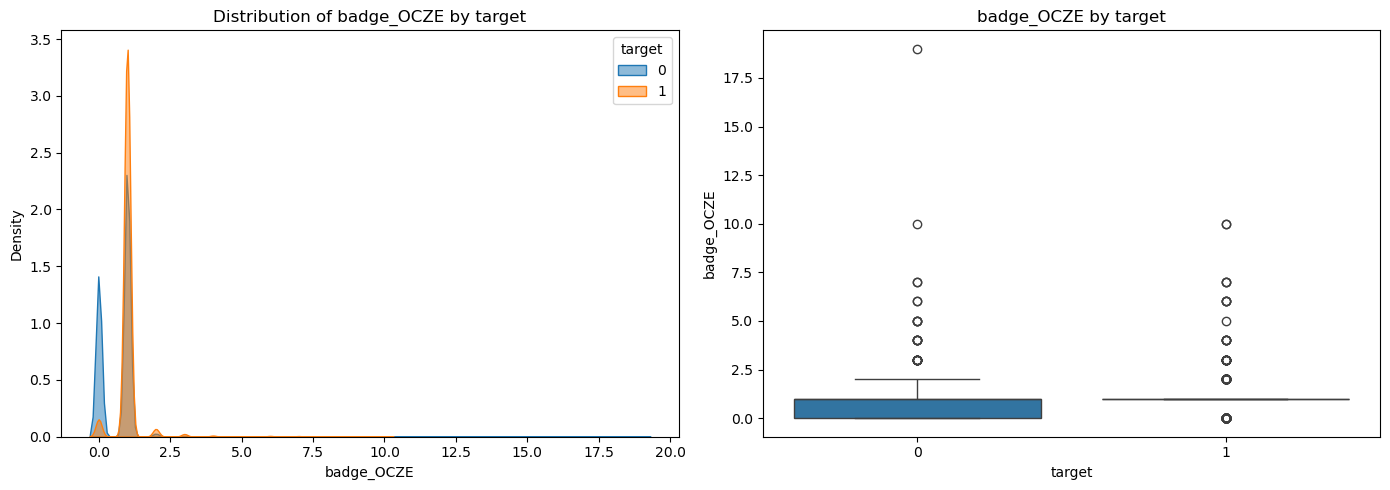

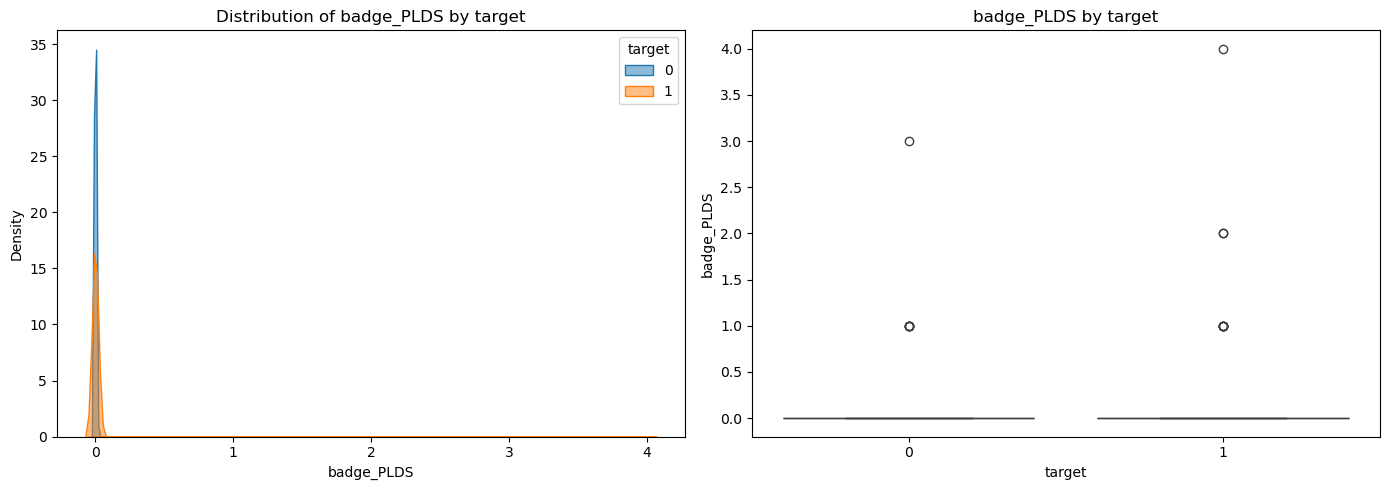

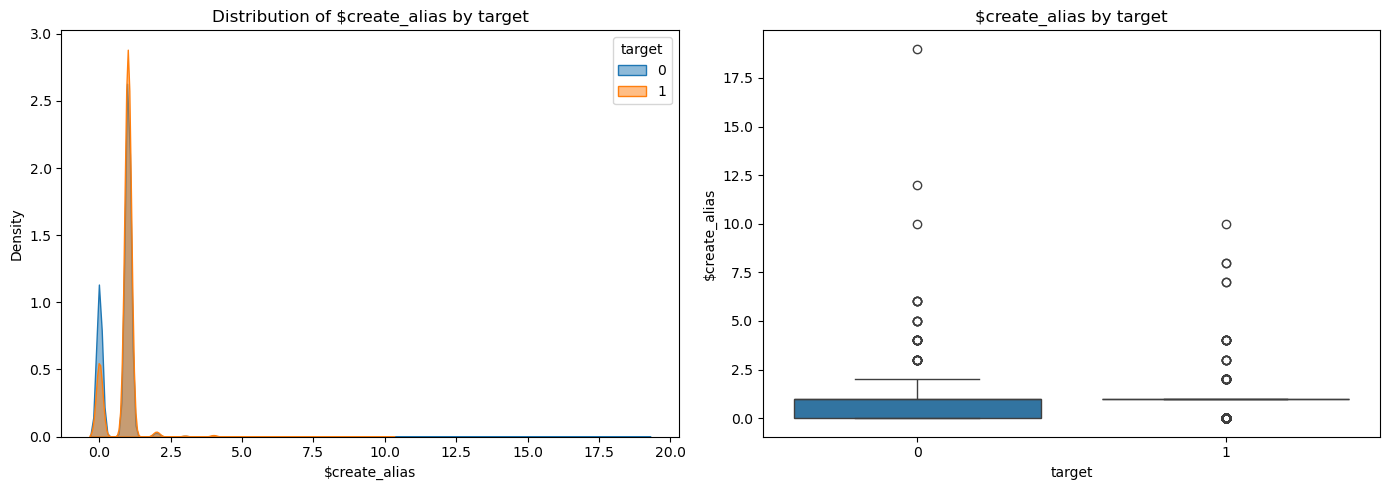

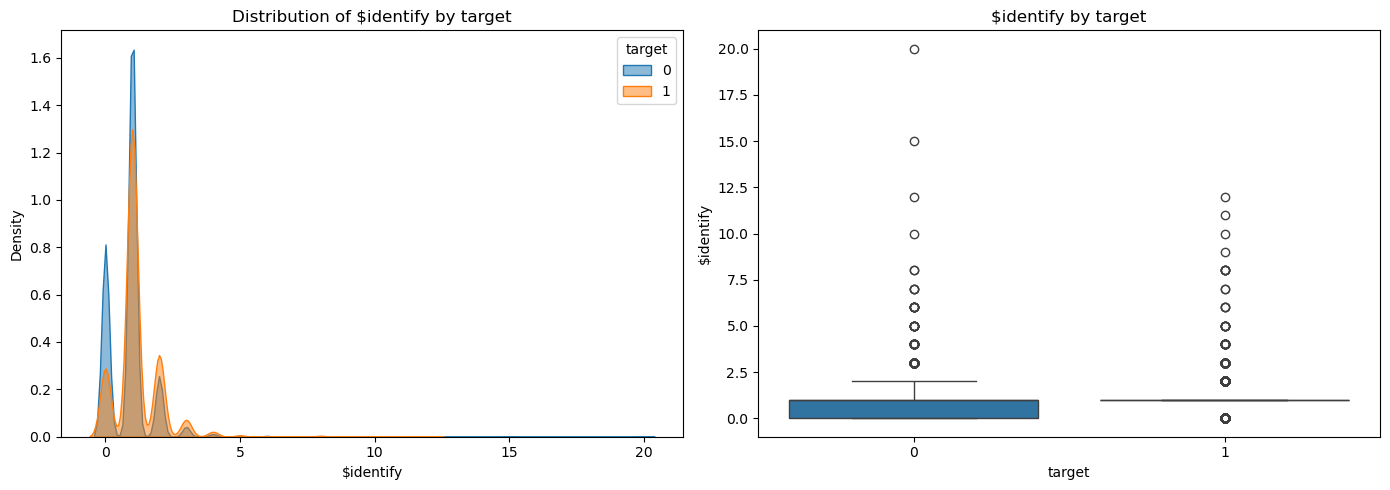

/home/omarfetou7/workspace/ML_MBZ/ML/project/New-User-Engagement/data_preprocessing/visualization_modular.py:113: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


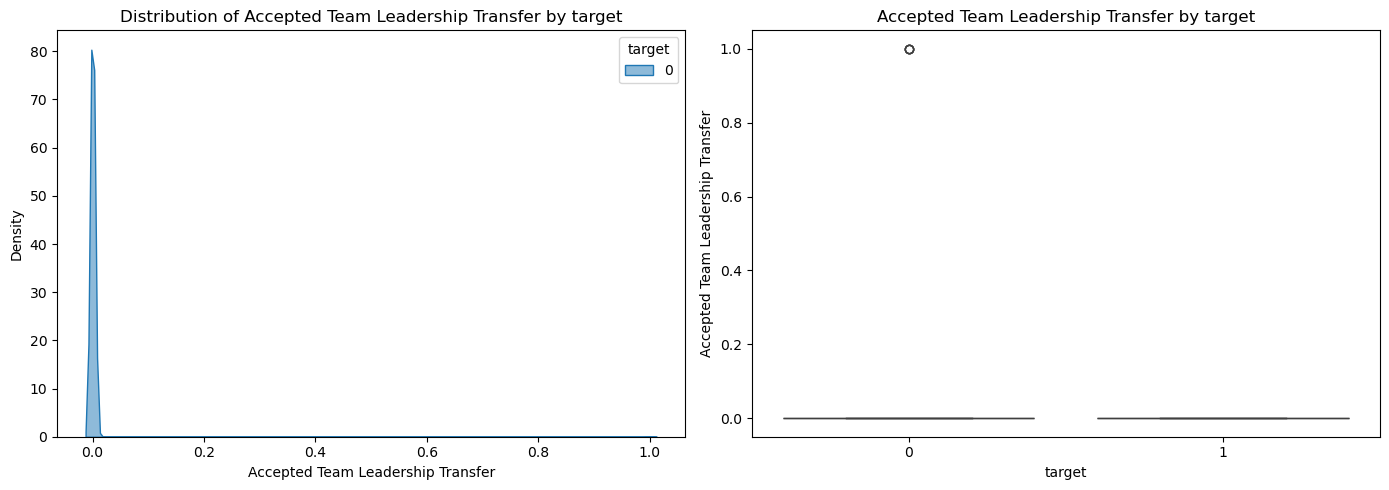

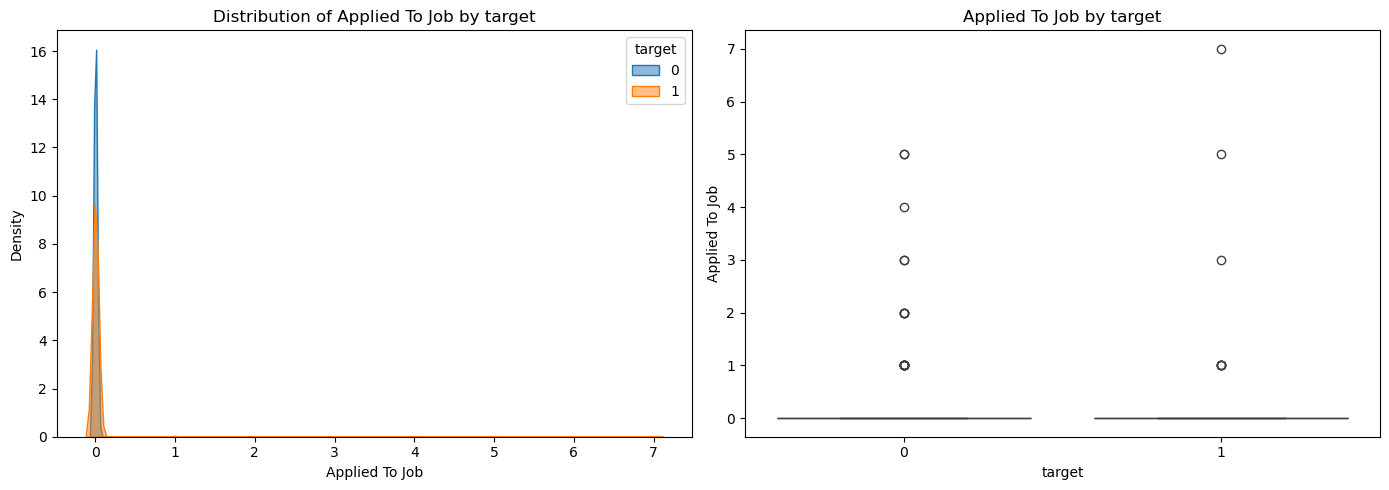

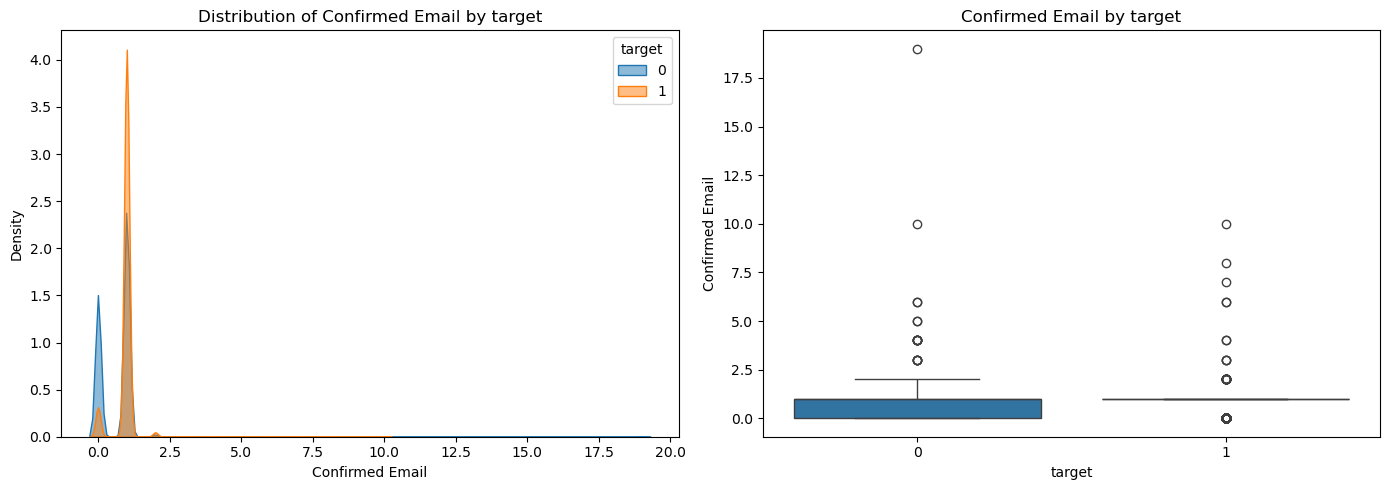

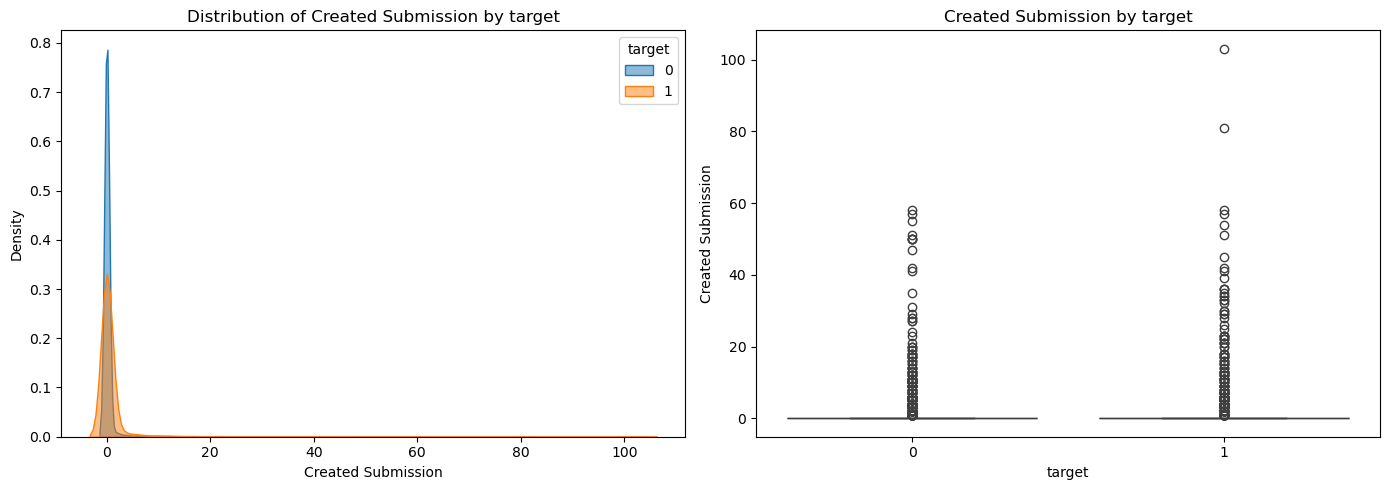

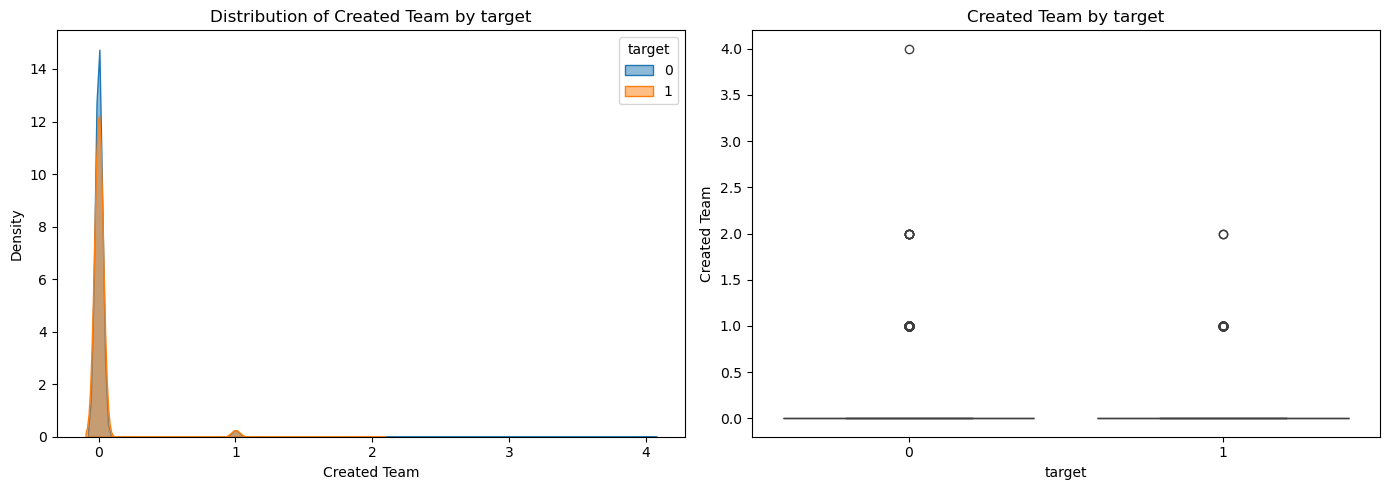

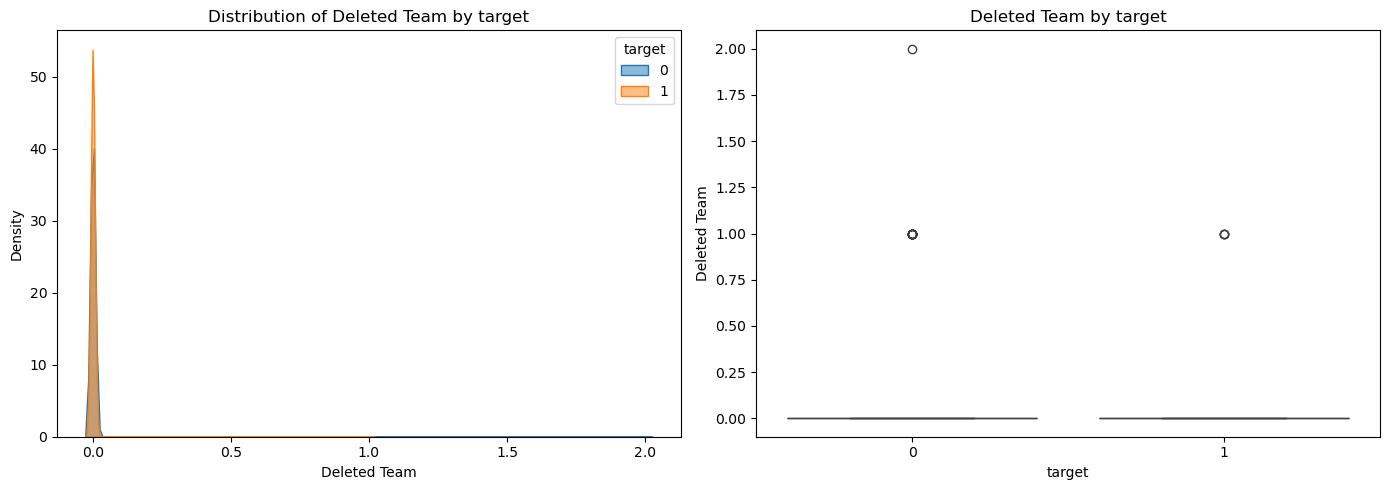

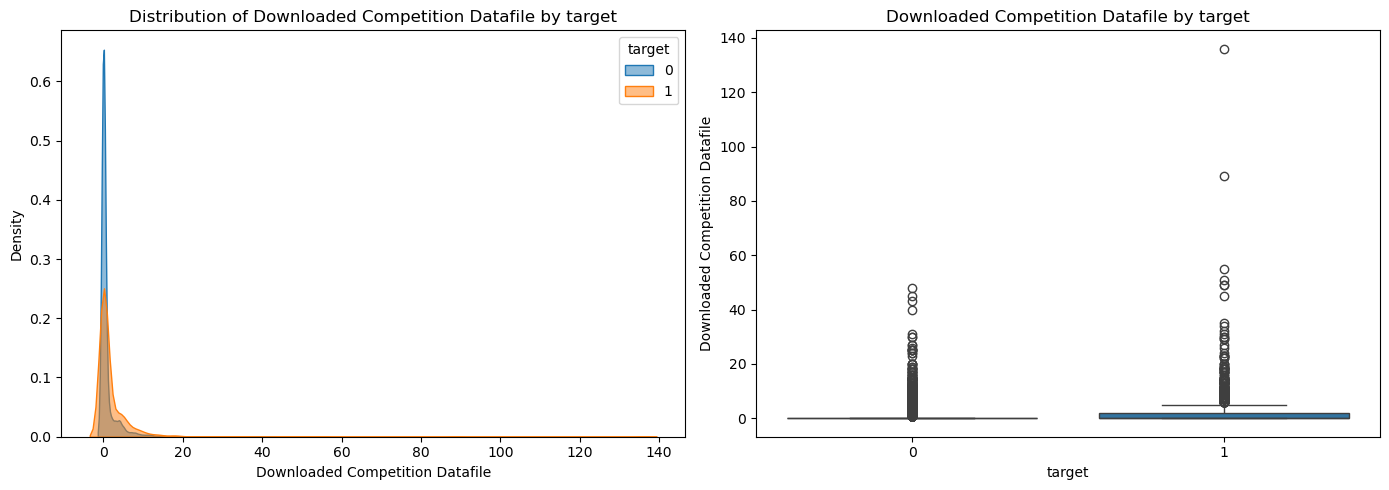

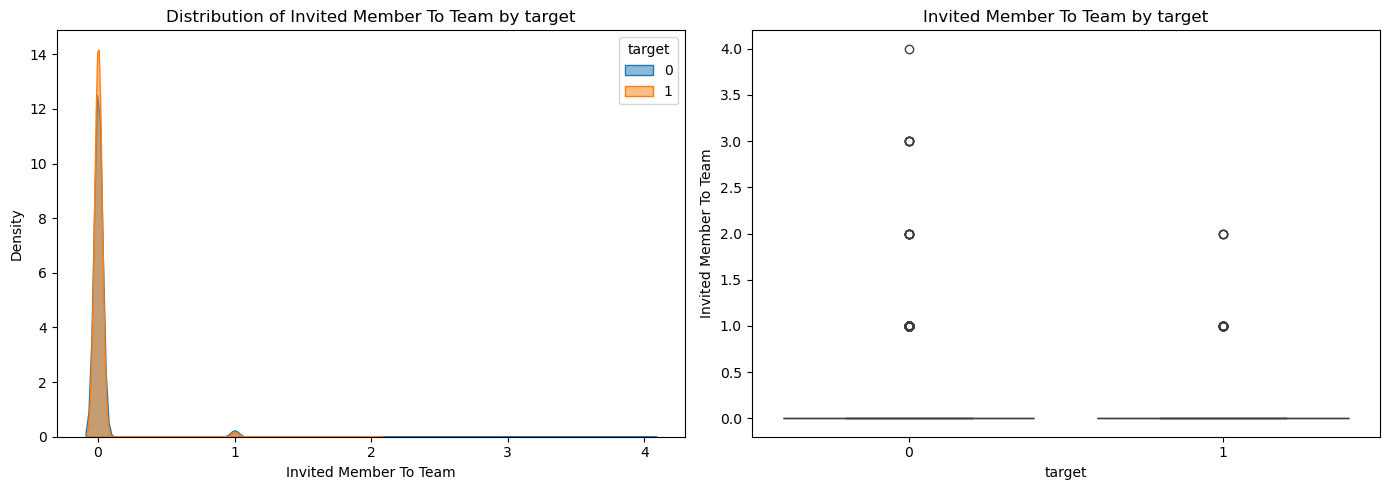

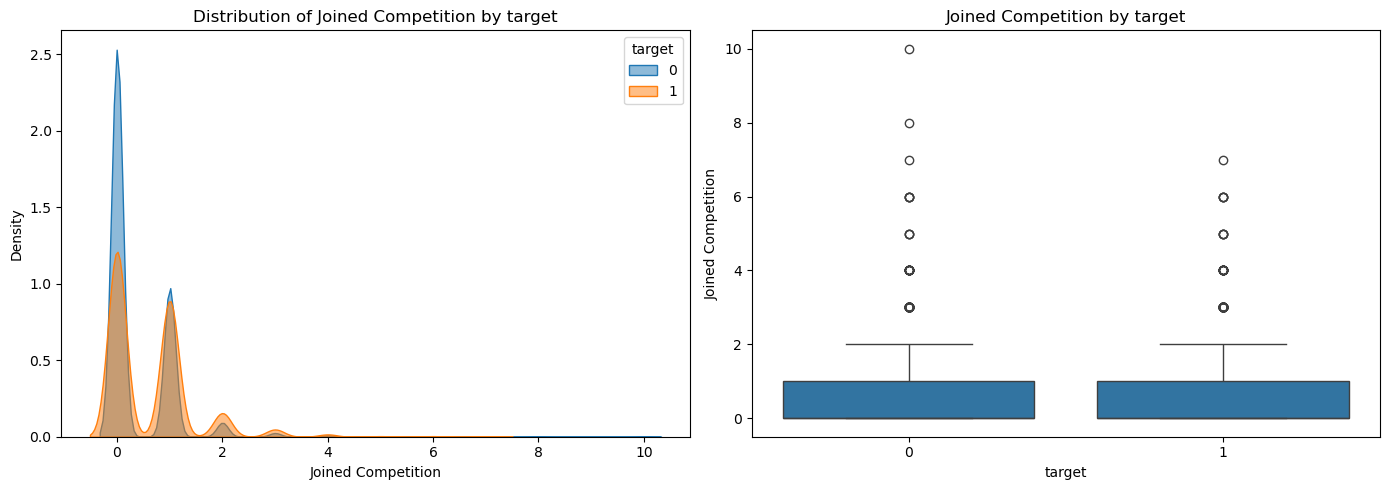

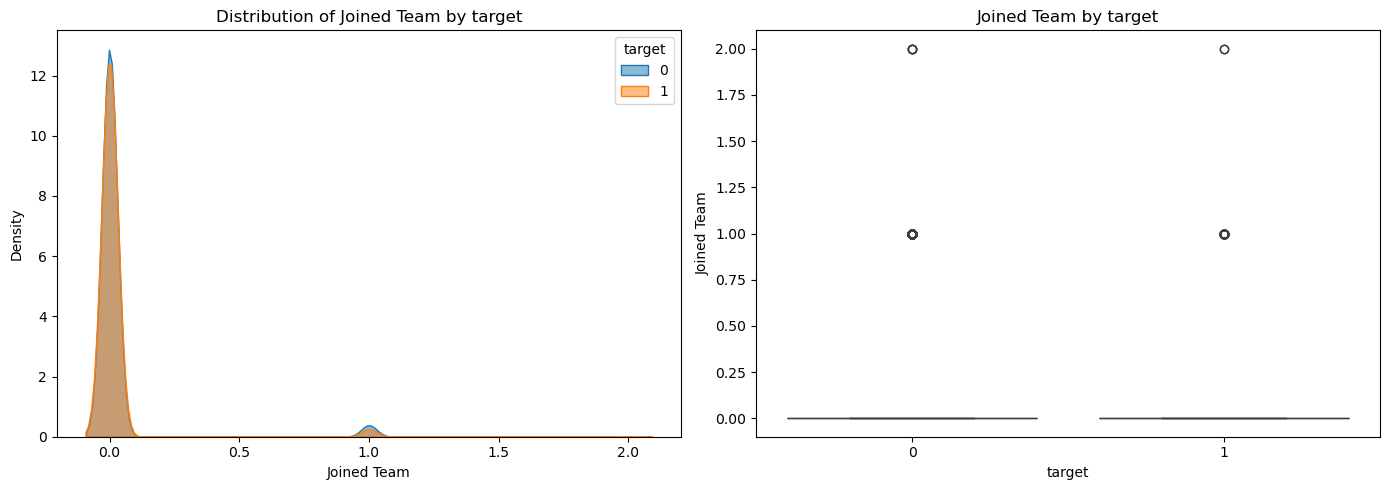

/home/omarfetou7/workspace/ML_MBZ/ML/project/New-User-Engagement/data_preprocessing/visualization_modular.py:113: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


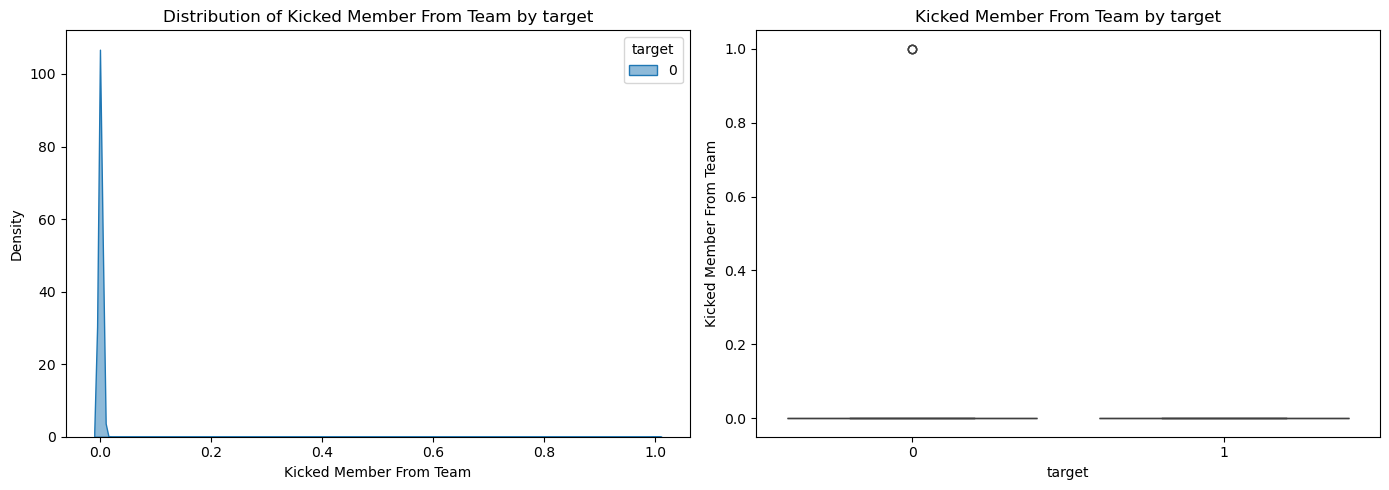

/home/omarfetou7/workspace/ML_MBZ/ML/project/New-User-Engagement/data_preprocessing/visualization_modular.py:113: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


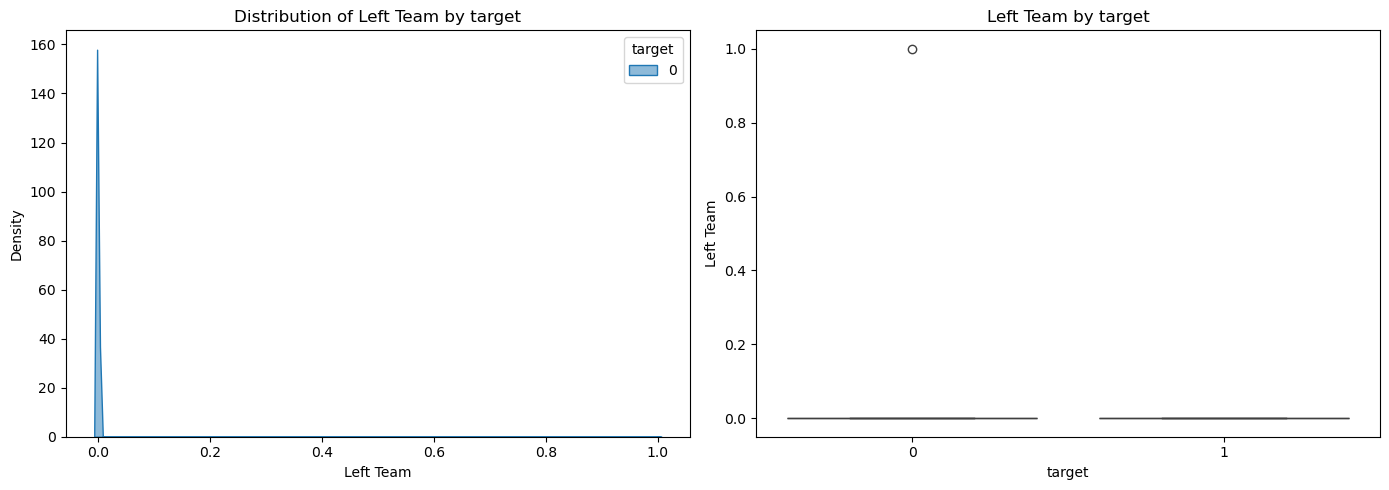

/home/omarfetou7/workspace/ML_MBZ/ML/project/New-User-Engagement/data_preprocessing/visualization_modular.py:113: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


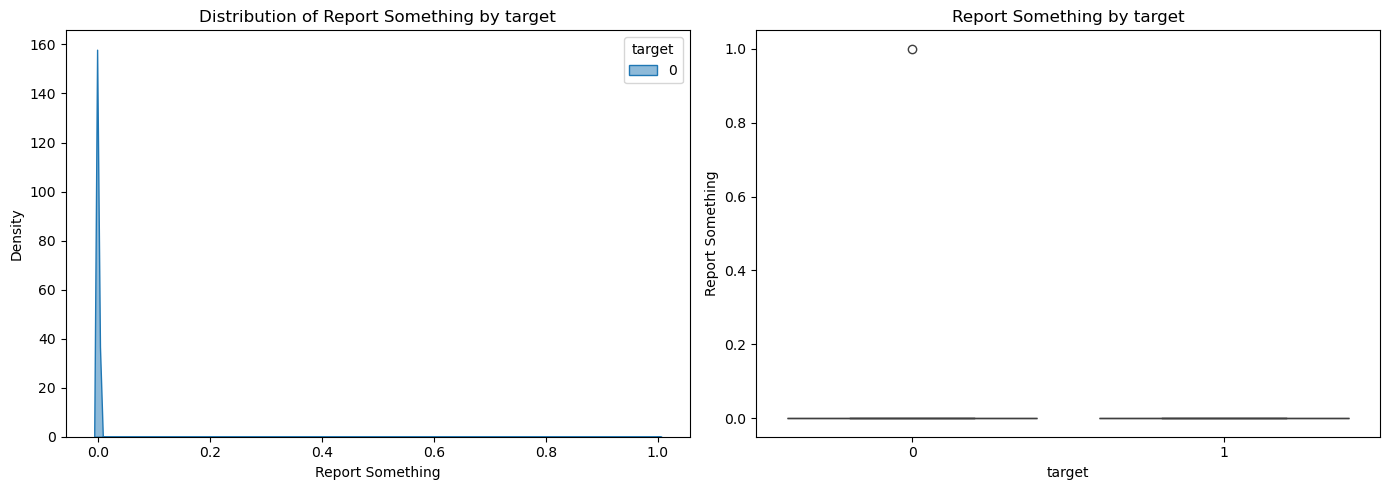

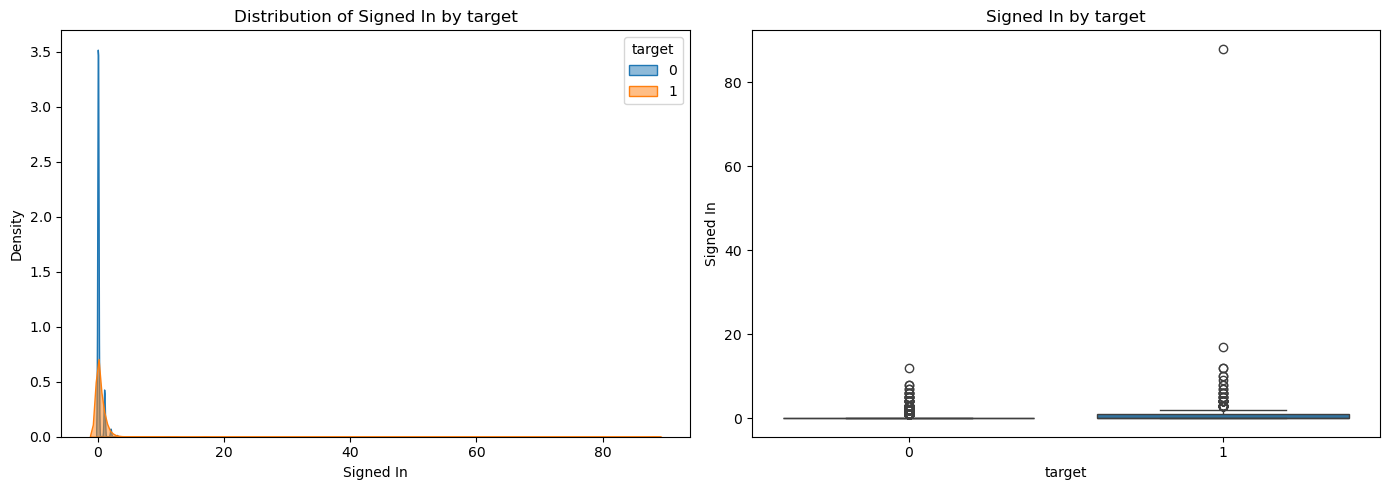

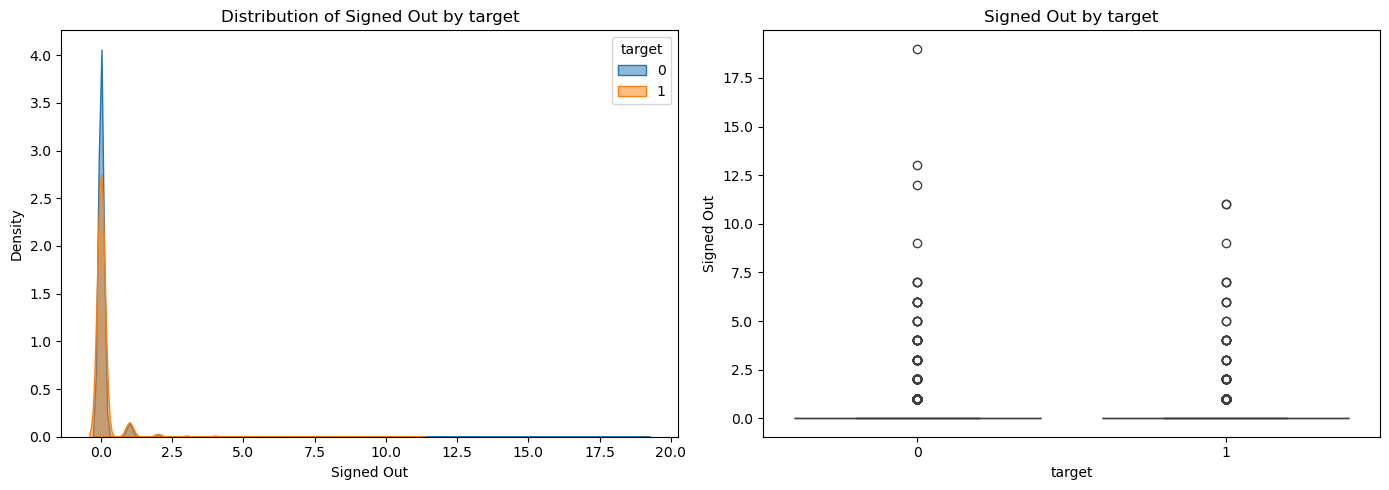

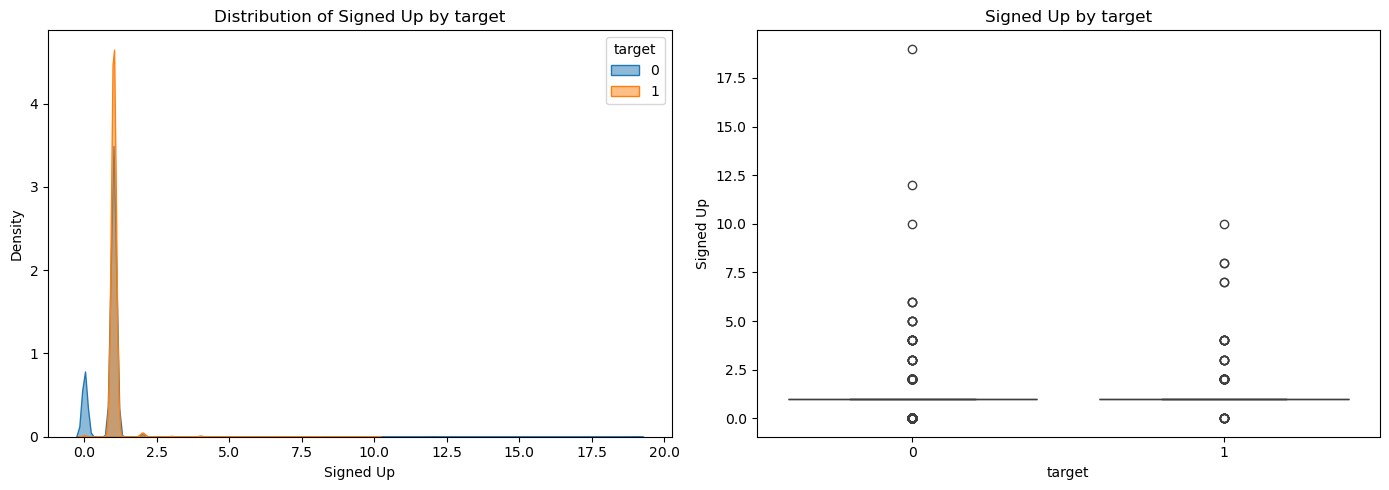

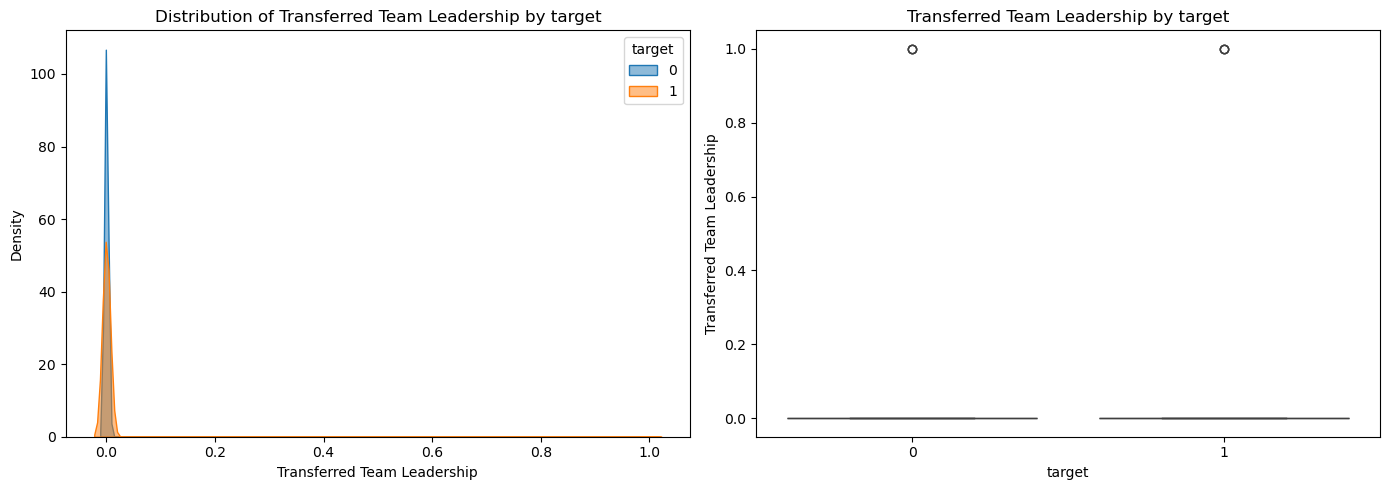

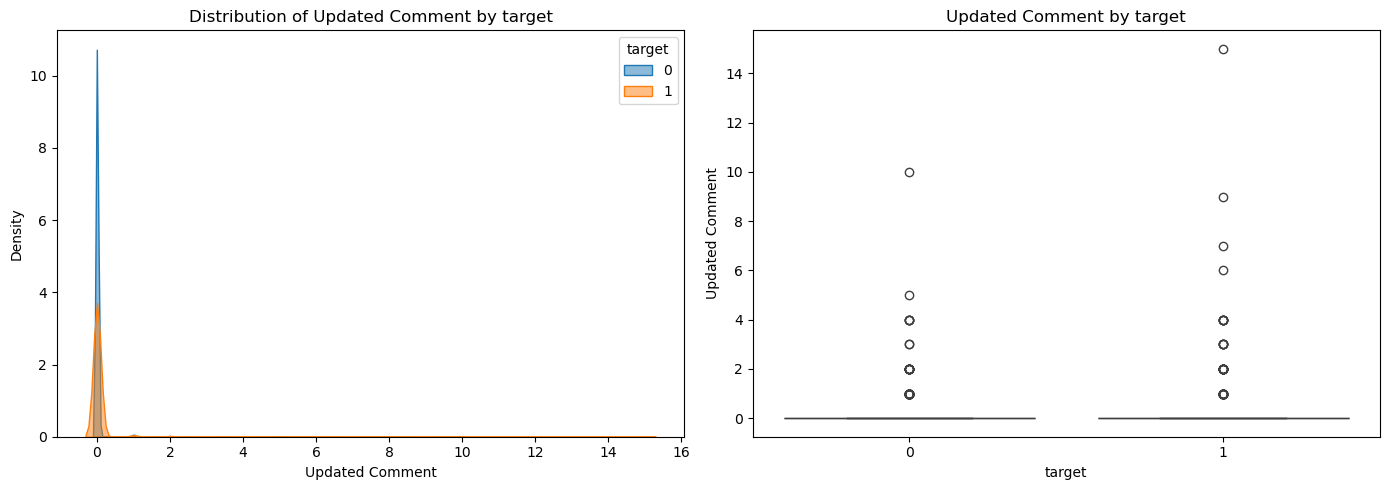

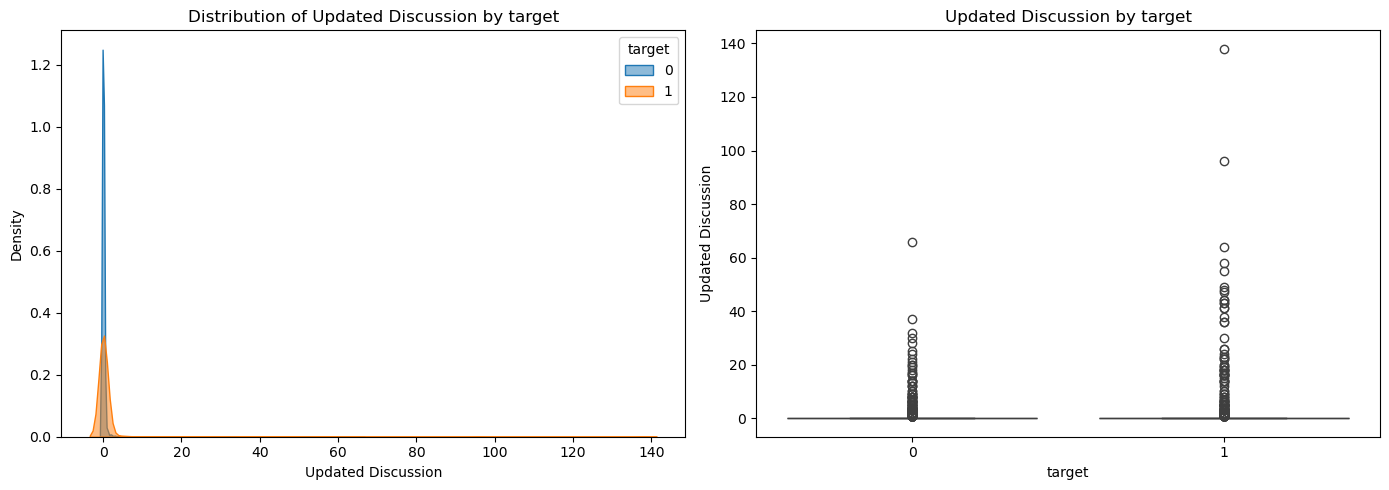

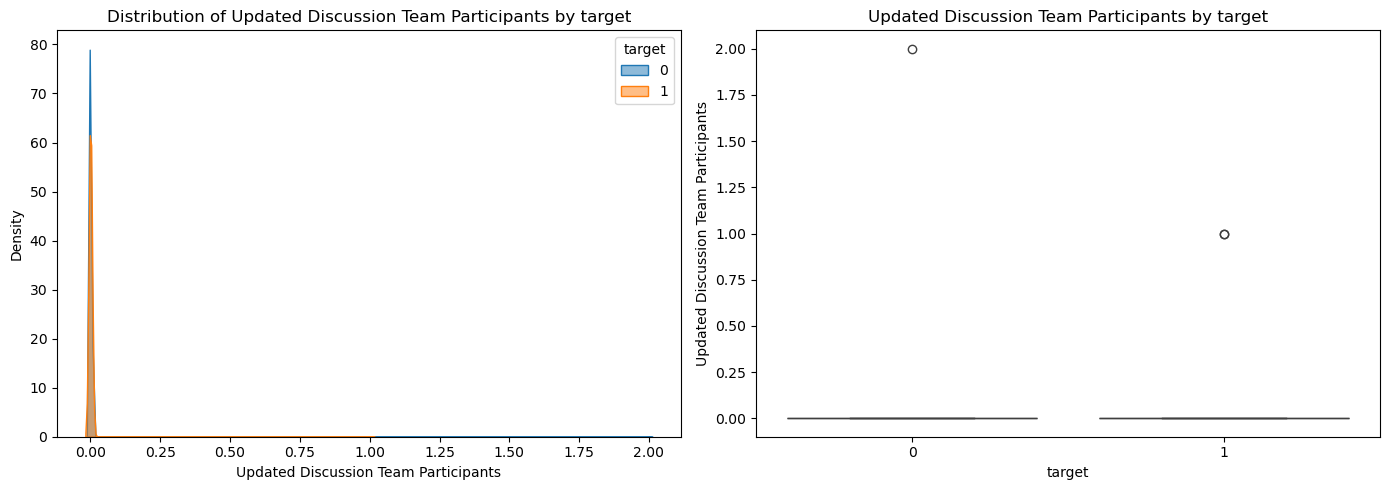

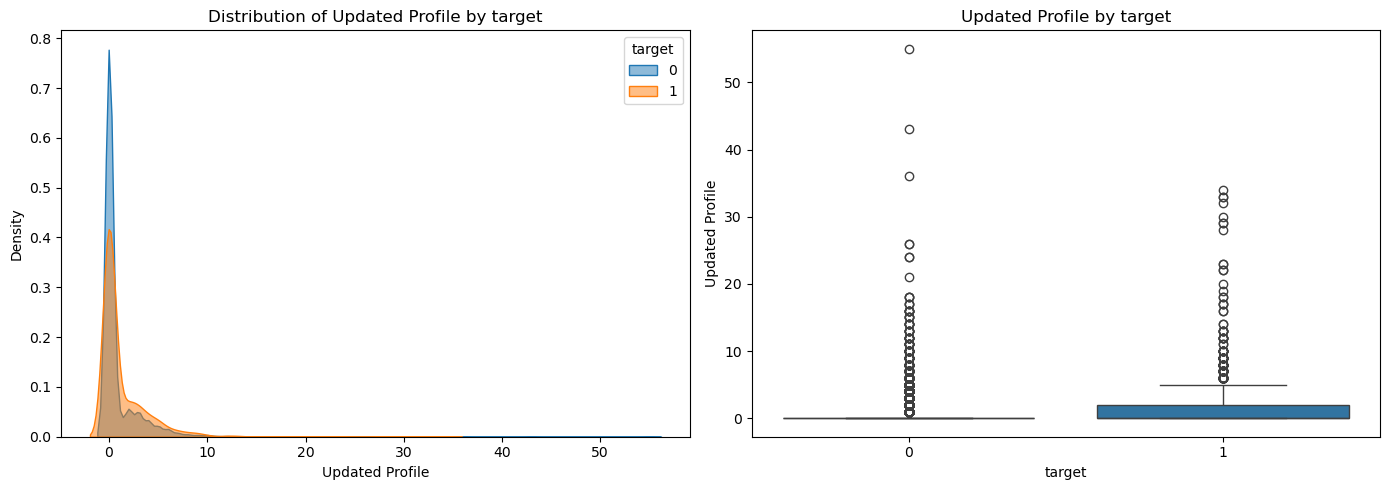

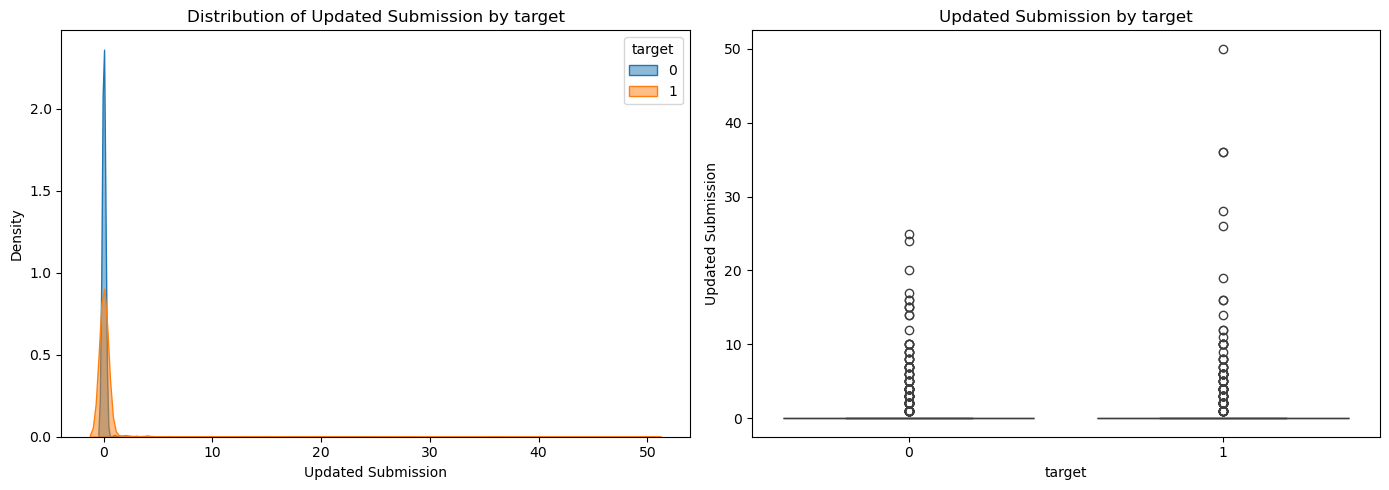

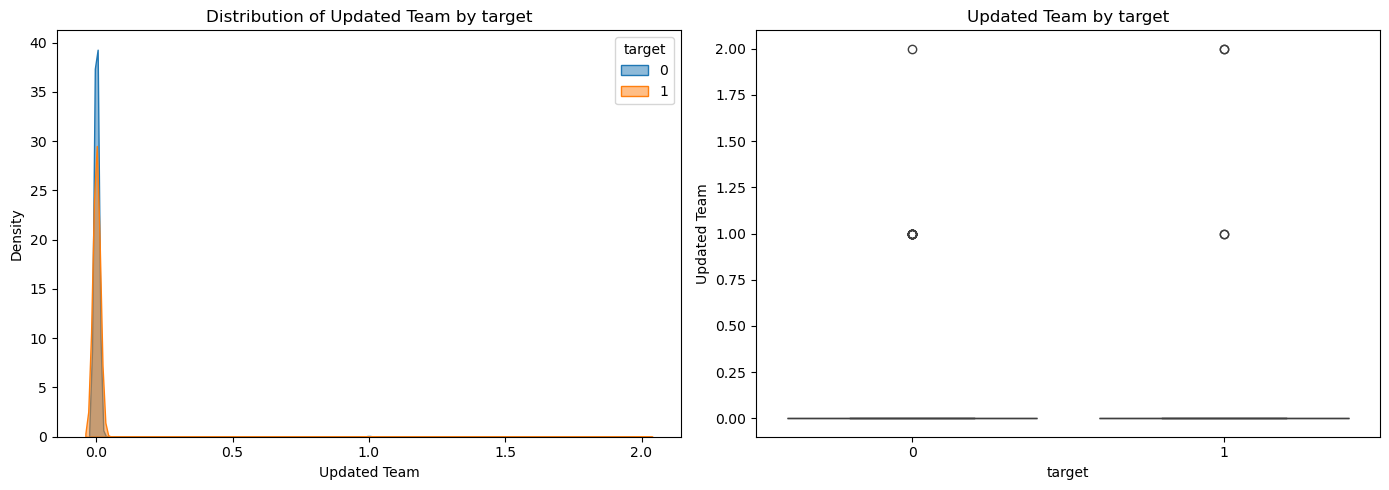

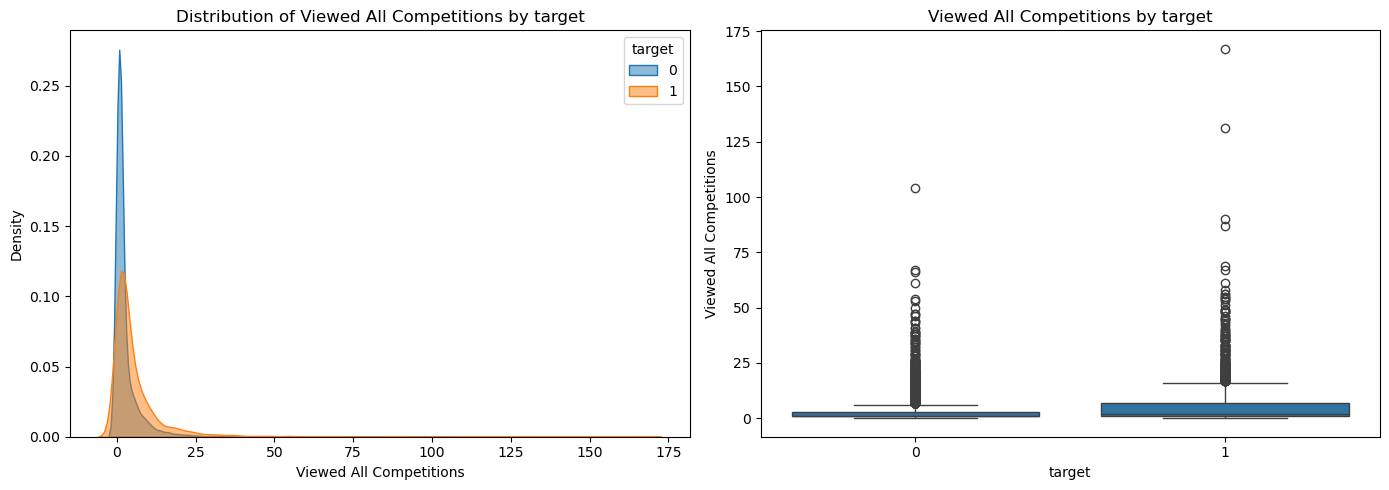

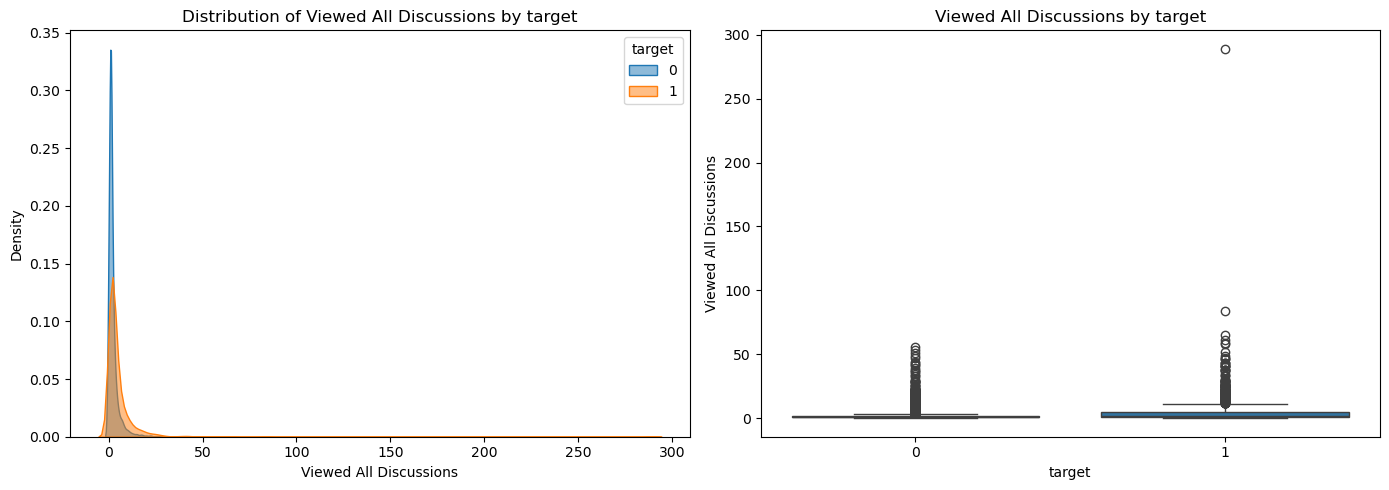

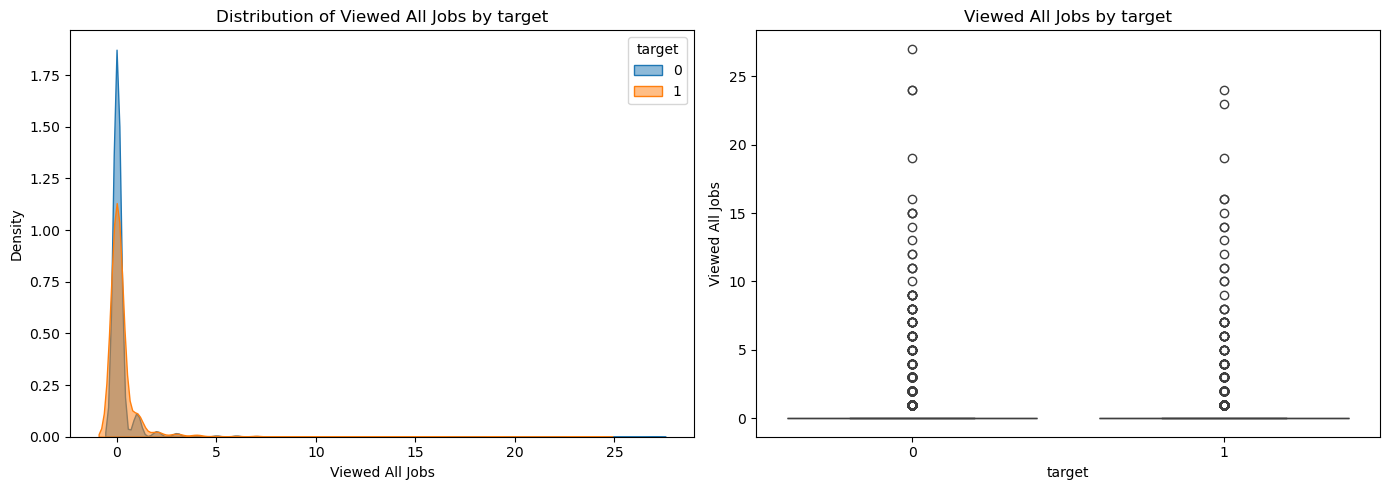

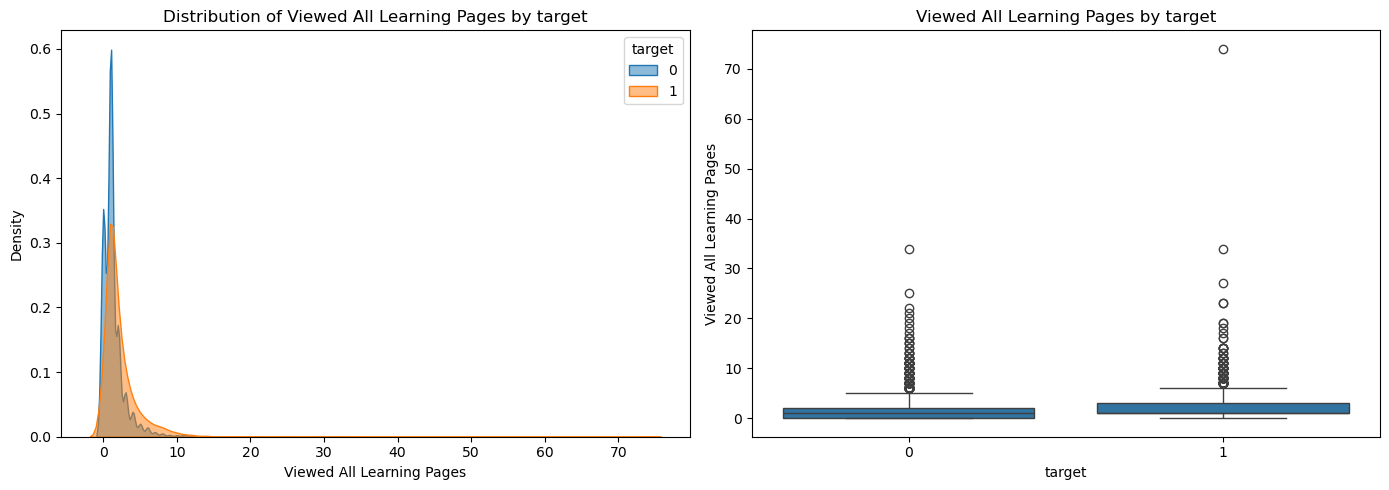

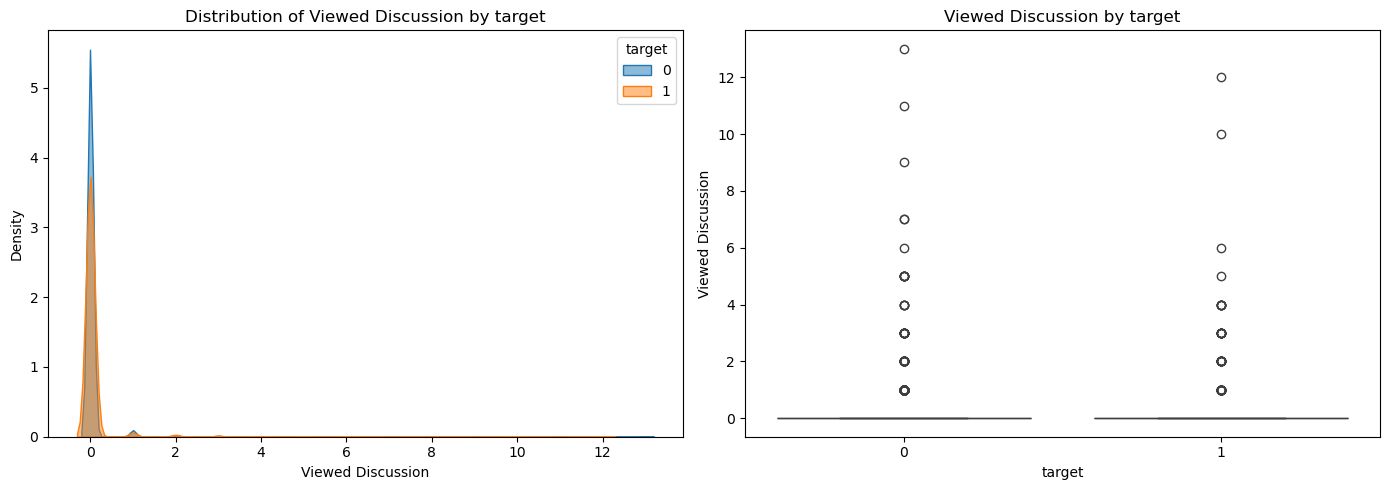

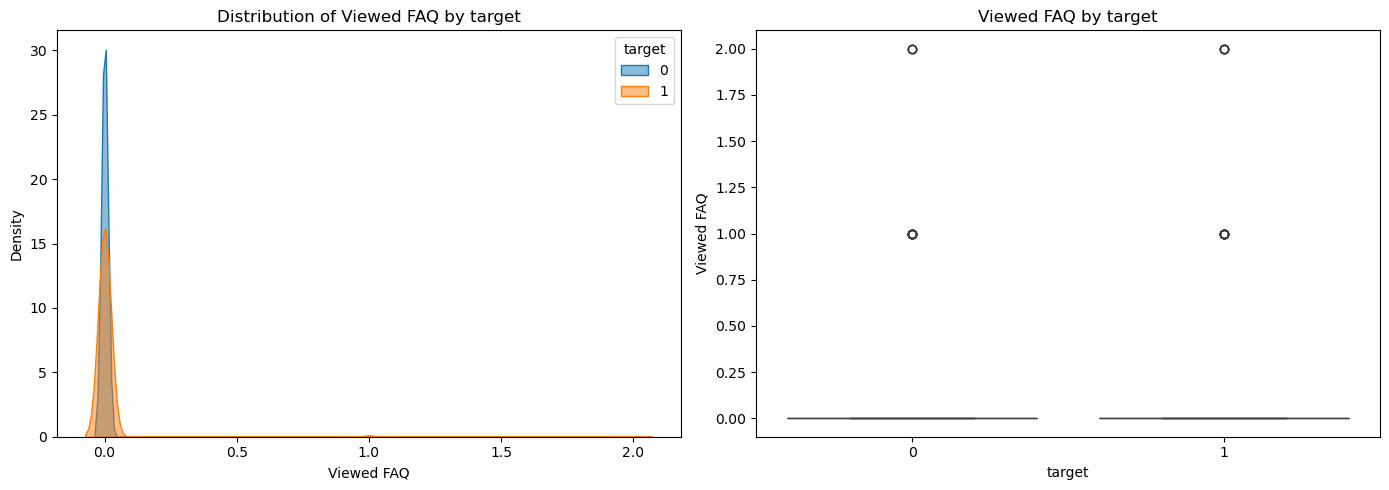

/home/omarfetou7/workspace/ML_MBZ/ML/project/New-User-Engagement/data_preprocessing/visualization_modular.py:109: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


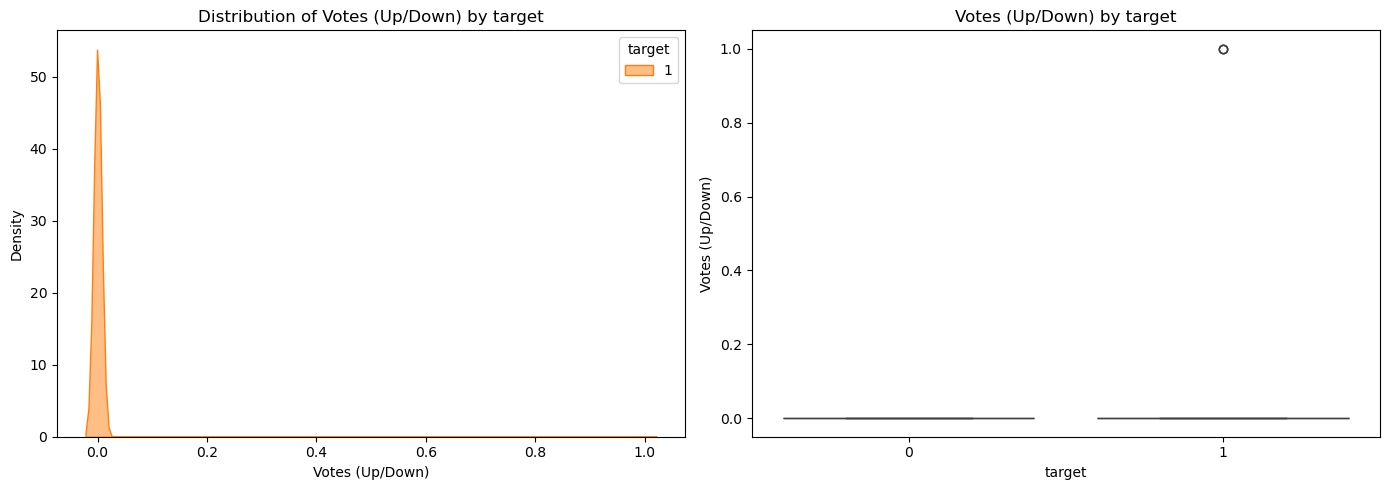

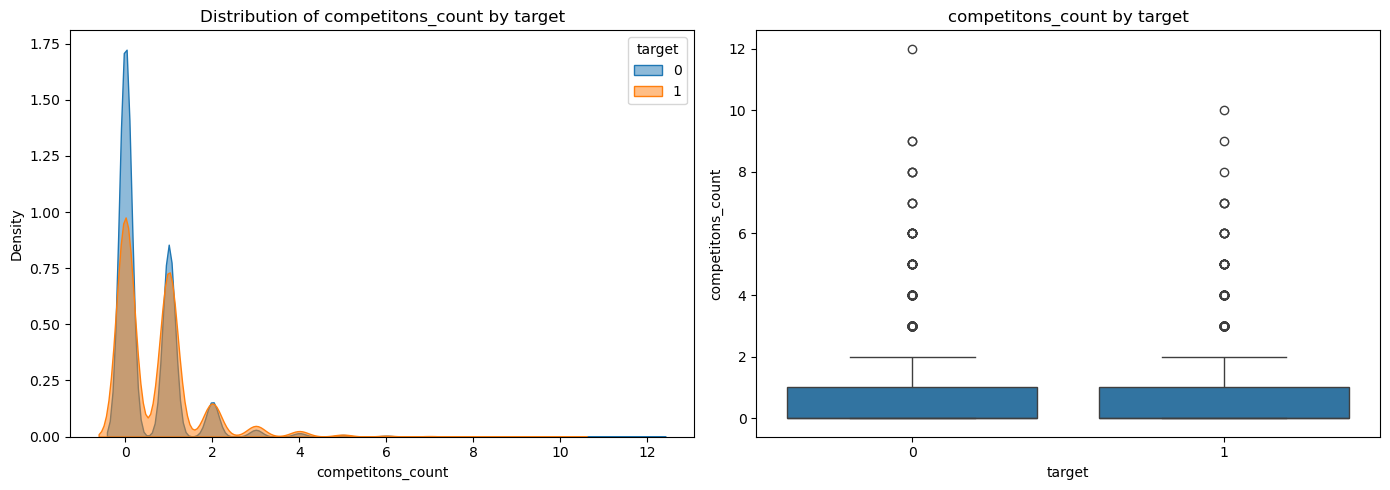

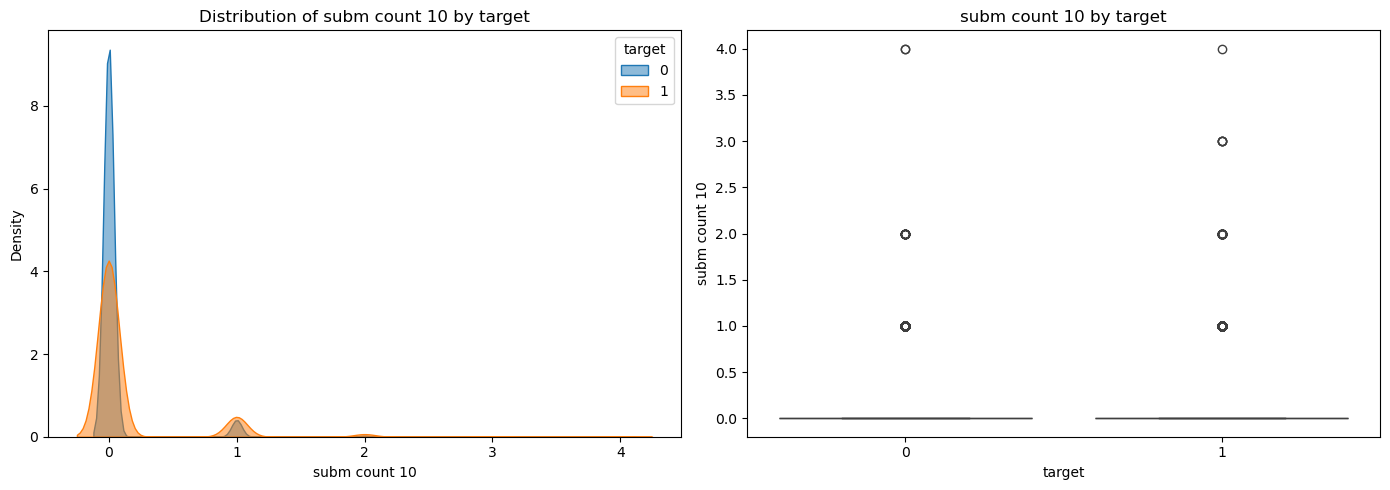

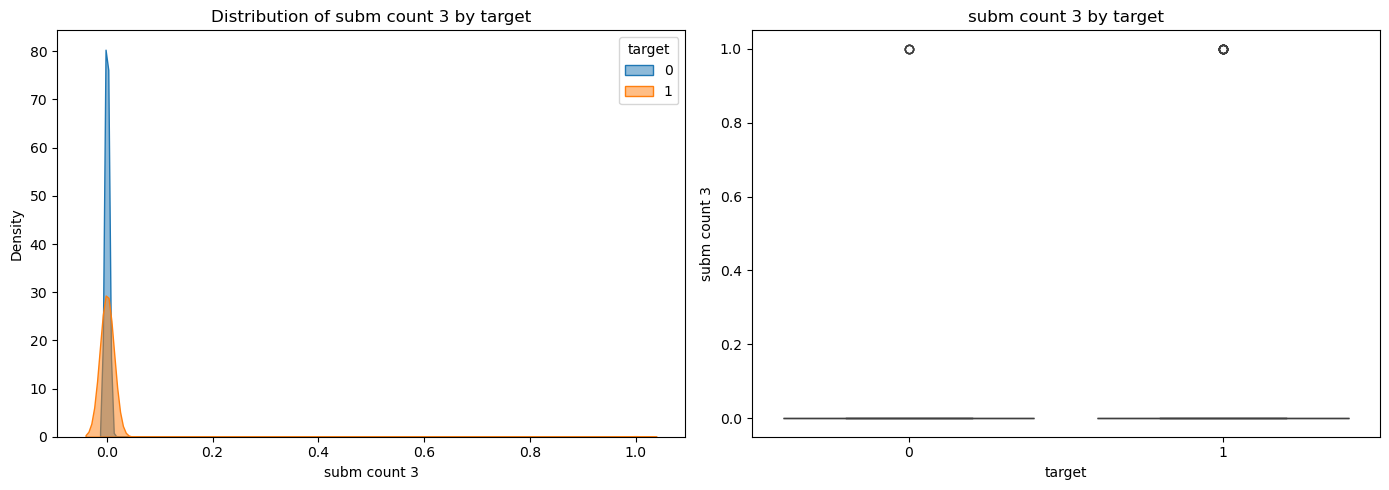

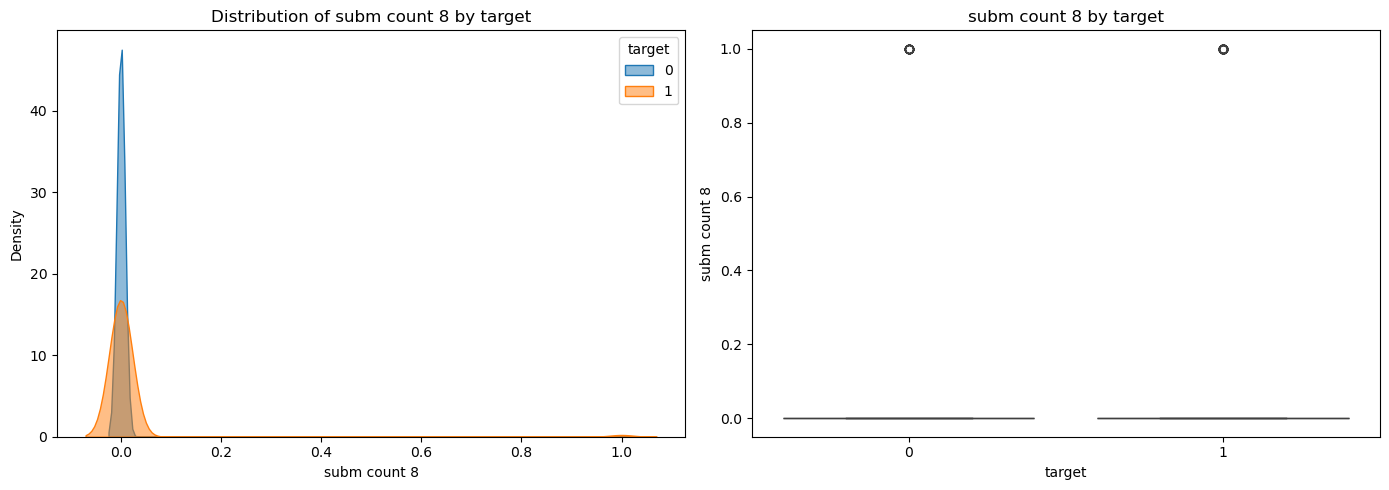

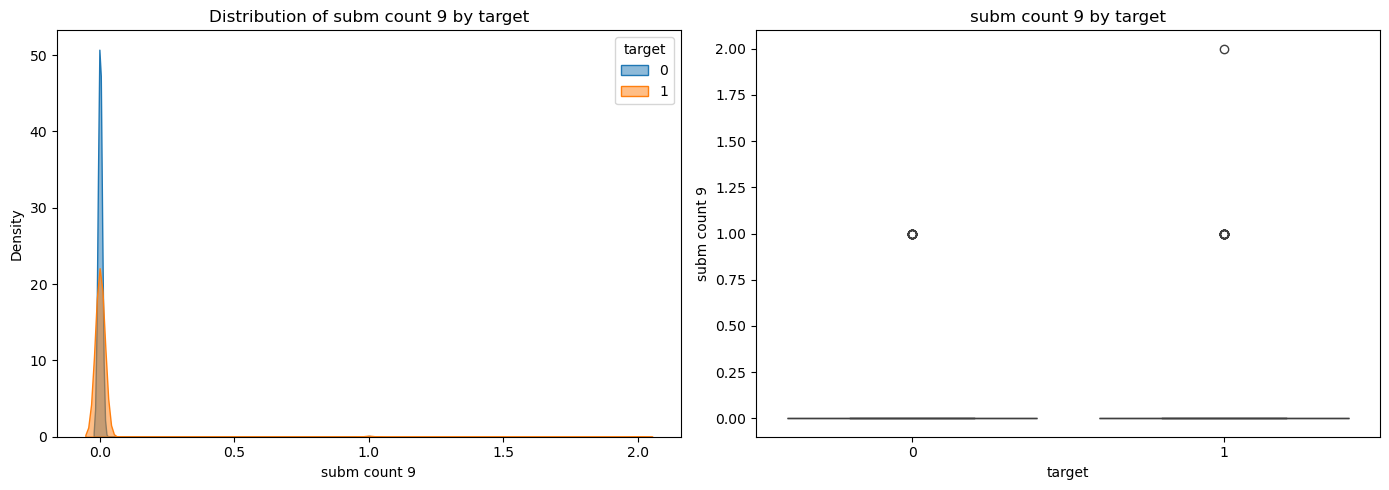

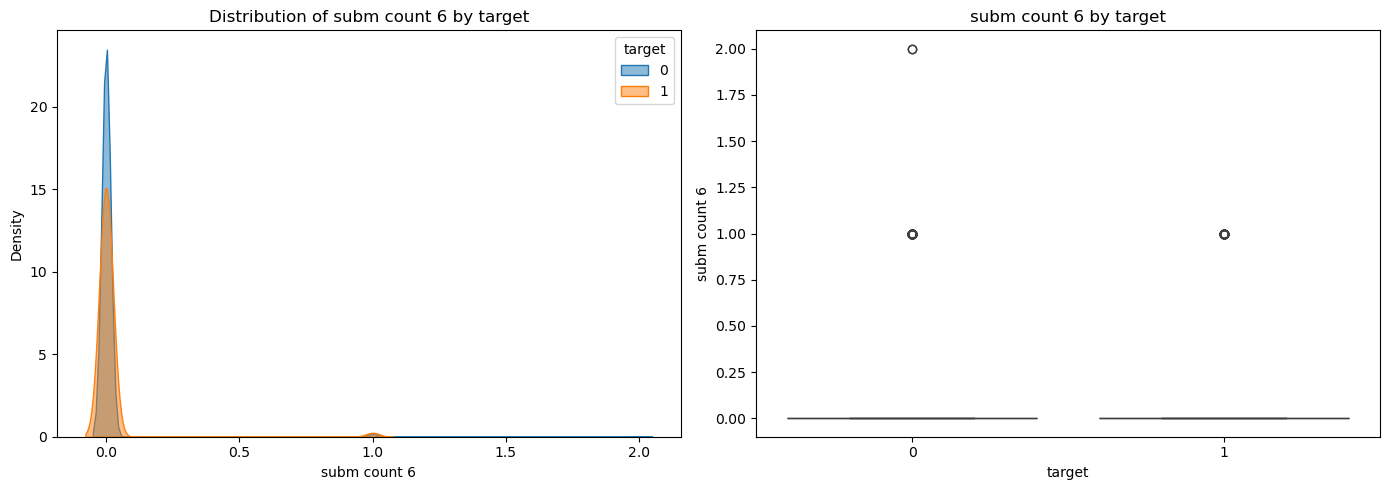

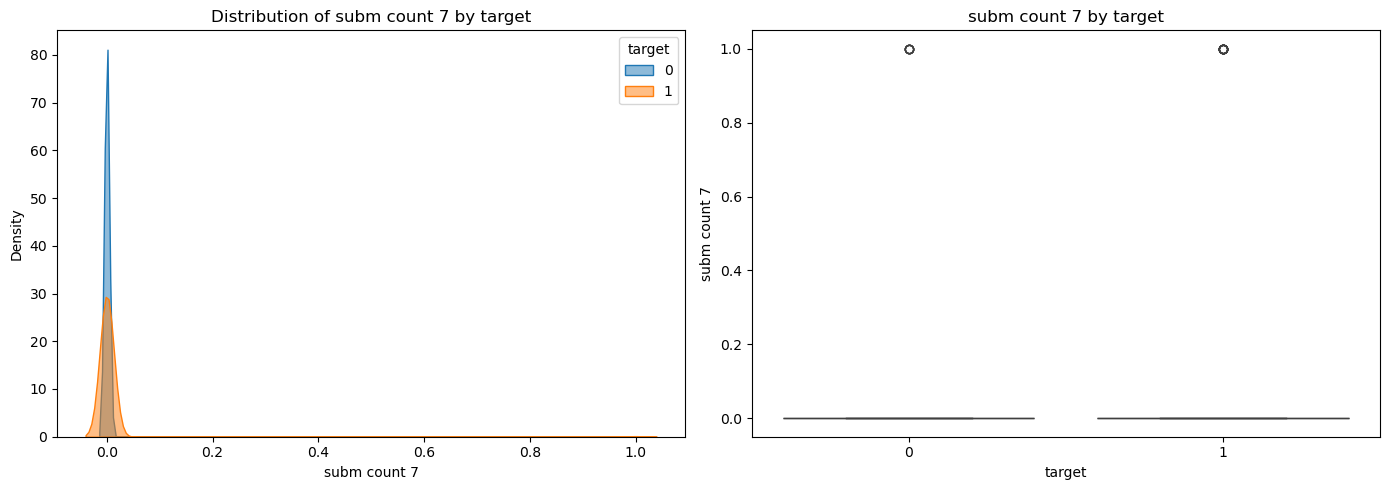

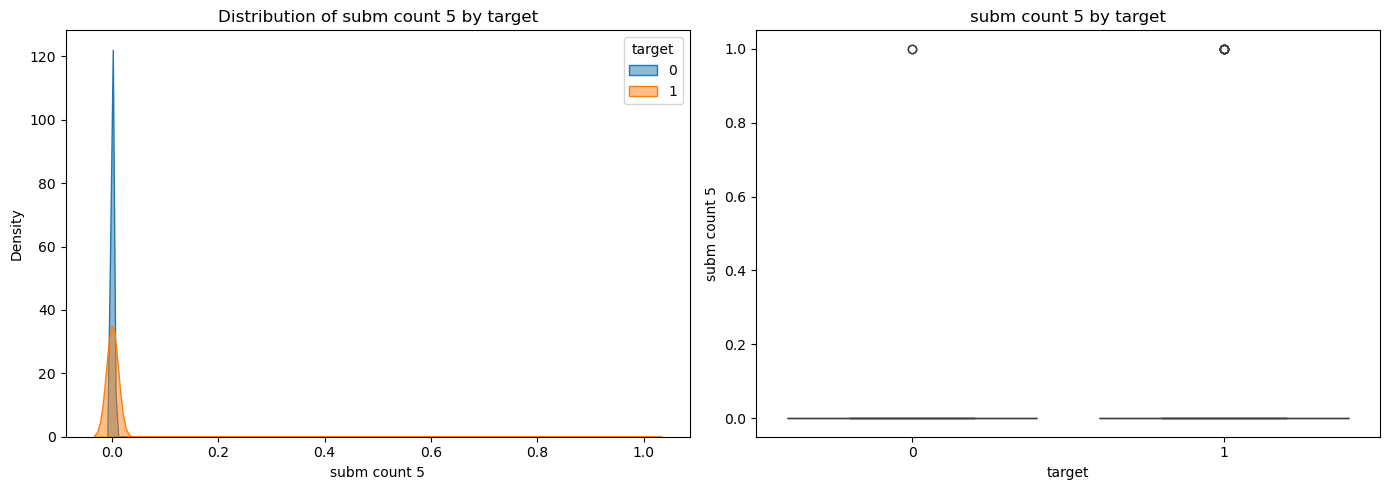

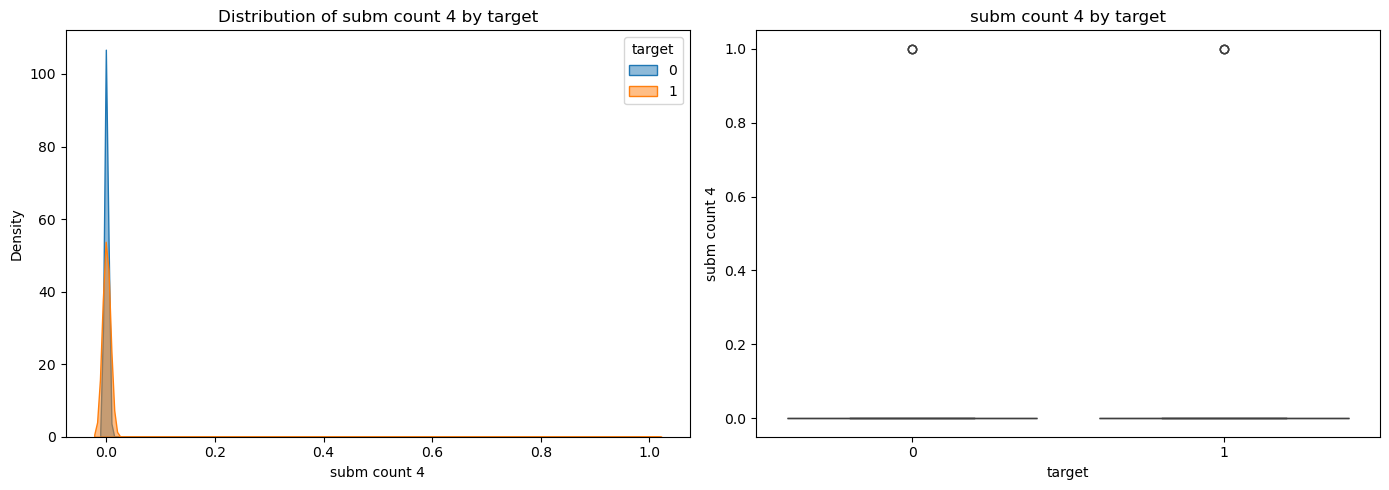

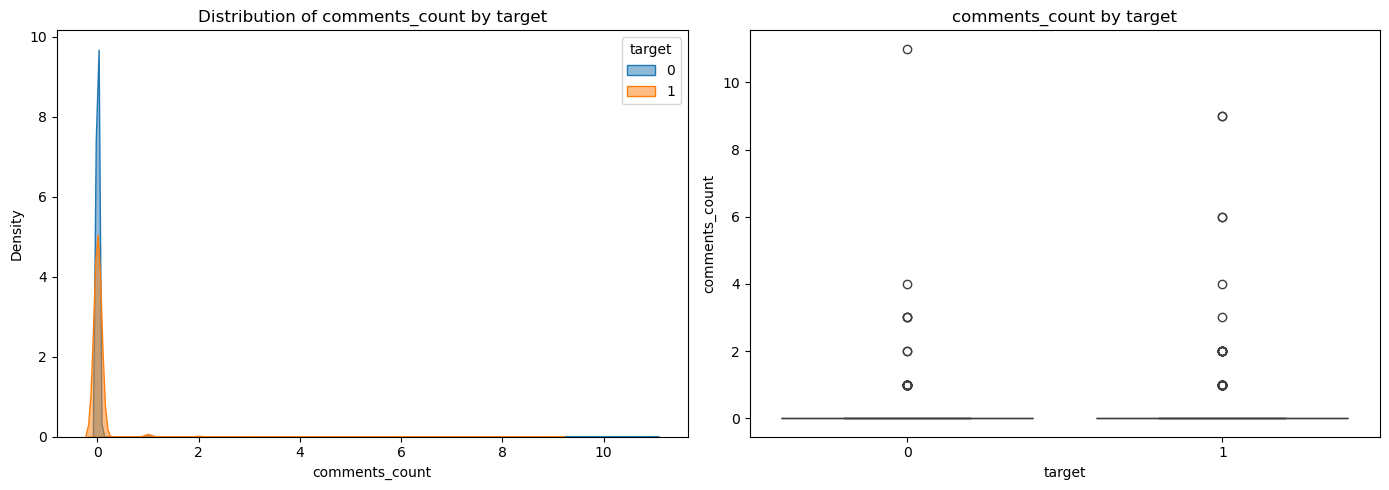

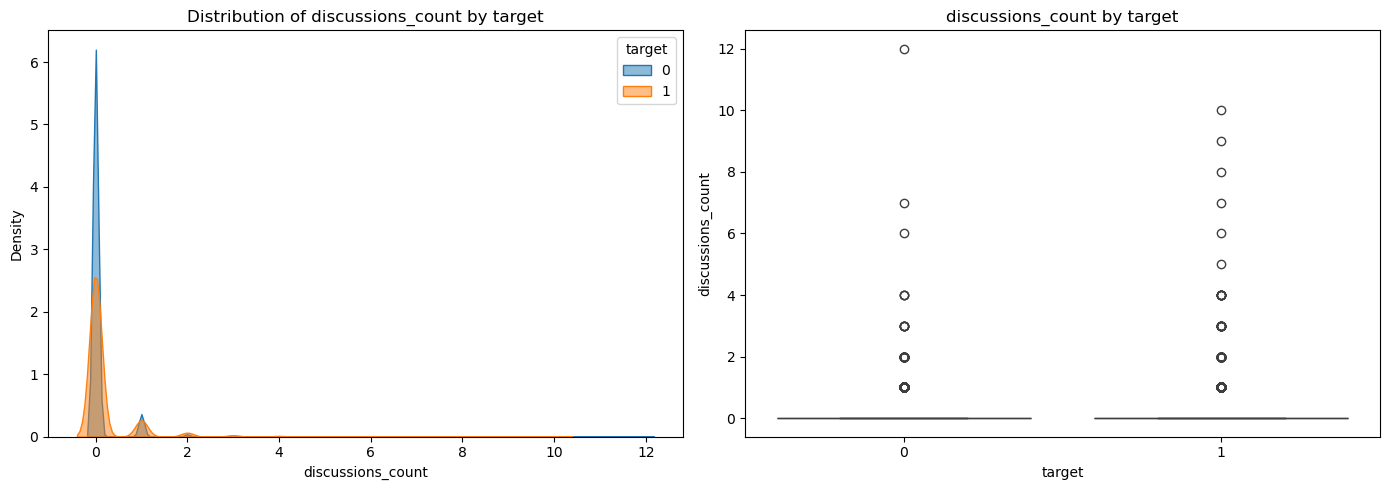

In [6]:
plot_feature_distributions(df)

# PCA Analysis
Compute PCA projections to measure how many orthogonal components explain the bulk of variance and to visualize reconstruction error. If a handful of components capture most structure, dimensionality reduction could simplify downstream models. However in our case no bulk of variance was noticed across different values of dimensions for PCA indicating that PCA didnt provide any beneficial dimension reduction


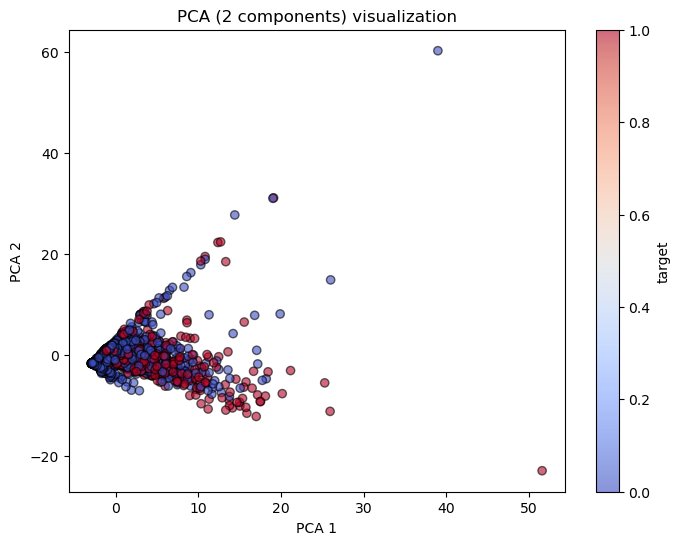

For 2 components:
Reconstruction MSE: 57.99615537351232
Explained variance ratio: [0.10812815 0.06199489]
Cumulative variance explained: 0.17012303691529496
For 3 components:
Reconstruction MSE: 57.70174952780324
Explained variance ratio: [0.10812815 0.06199489 0.04123168]
Cumulative variance explained: 0.21135471702836303
For 4 components:
Reconstruction MSE: 57.471123249122606
Explained variance ratio: [0.10812815 0.06199489 0.04123168 0.03971921]
Cumulative variance explained: 0.25107392700325804
For 5 components:
Reconstruction MSE: 55.56846843725856
Explained variance ratio: [0.10812815 0.06199489 0.04123168 0.03971921 0.03212143]
Cumulative variance explained: 0.2831953600502003
For 6 components:
Reconstruction MSE: 55.2095623634368
Explained variance ratio: [0.10812815 0.06199489 0.04123168 0.03971921 0.03212143 0.03014232]
Cumulative variance explained: 0.31333767628035886
For 7 components:
Reconstruction MSE: 50.23988594752014
Explained variance ratio: [0.10812815 0.06199489 0

In [13]:
pca_analysis(df)

# t-SNE Analysis
Use t-SNE embeddings to explore whether active versus inactive users form separable clusters in a non-linear manifold. Clear separation suggests the features contain discriminative patterns worth investigating further. There was no clear seperation noticed from the t-SNE indicating that it wasnt able to find proper seperation between classes


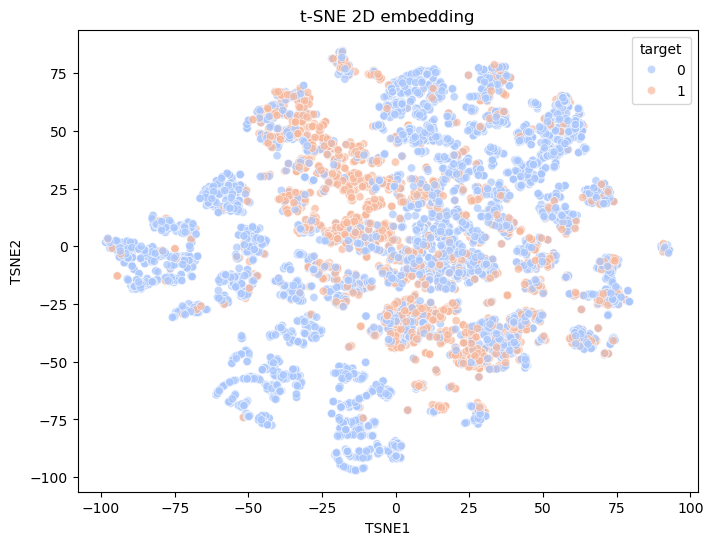

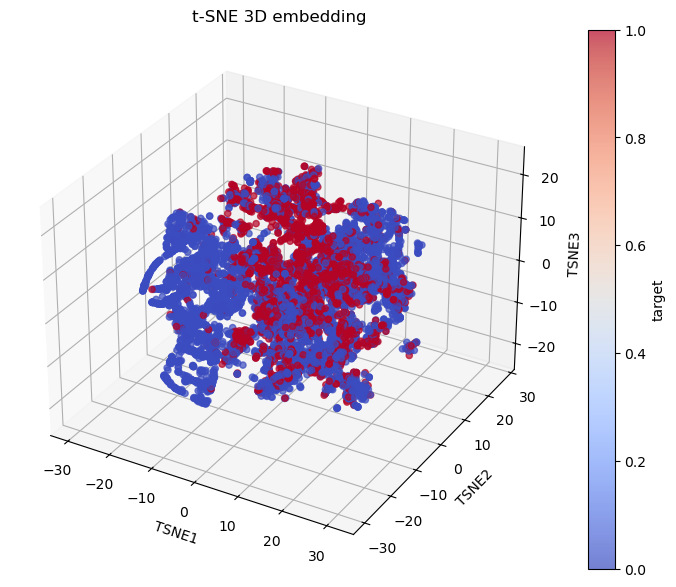

In [7]:
tsne_analysis(df)